# Loading the data

In [98]:
import pandas as pd
import numpy as np


In [99]:
import pandas as pd
import requests
import io

file_id = '1jpxel4H432tANWQs1wWbr-MvKm6B-vpd'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the contents of the CSV file
download = requests.get(url).content

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [100]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [101]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [102]:
#Fixing the data type of columns
numeric_columns = ["Delivery_person_Age", "Delivery_person_Ratings", "multiple_deliveries"]

for column in numeric_columns:
    df[column] = df[column].astype(float)


# Removing duplicates

In [103]:
df.duplicated().sum()


#no duplicates

0

# Checking whether there are data points where latitude and longitude of restuarants and delivery locations differ alot

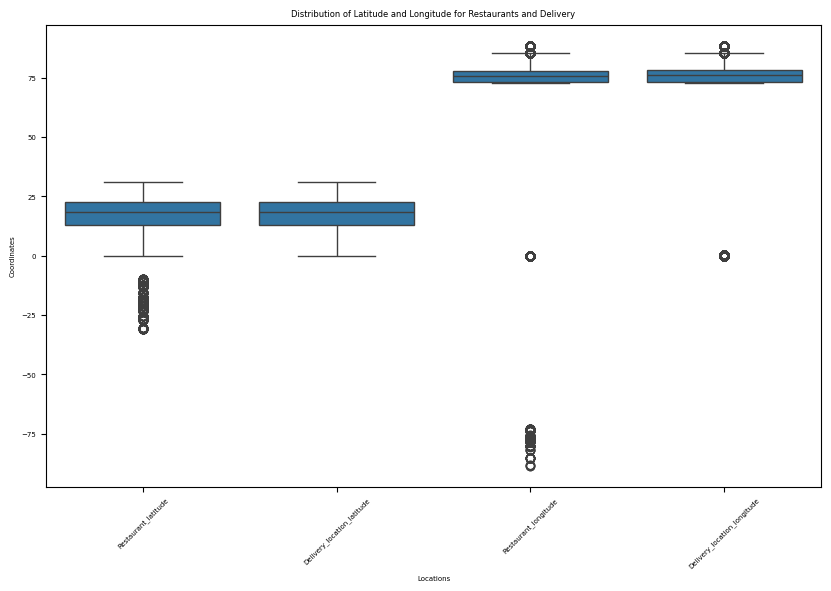

In [104]:
# Melt the DataFrame to long format

import matplotlib.pyplot as plt
import seaborn as sns

plot_loc = df.melt(value_vars=['Restaurant_latitude', 'Delivery_location_latitude', 'Restaurant_longitude', 'Delivery_location_longitude'])

plt.figure(figsize=(10, 6))  # Adjust the size based on your needs
sns.boxplot(x='variable', y='value', data= plot_loc)
plt.ylabel('Coordinates')
plt.xlabel('Locations')
plt.title('Distribution of Latitude and Longitude for Restaurants and Delivery')
plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.show()

In [105]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,(min) 26


# Handling Null values



In [106]:
#Convert String 'NaN' to np.nan
import numpy as np
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)


#Check null values
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
ID                                0
Delivery_person_ID                0
Restaurant_latitude               0
Restaurant_longitude              0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_latitude        0
Delivery_location_longitude       0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_taken(min)                   0
dtype: int64

In [107]:
filtered_df = df
null_rows = filtered_df[filtered_df.isnull().any(axis=1)].shape[0]
print(null_rows)


4225


In [108]:
filtered_df.dropna(inplace=True)

In [109]:
#Rechecking for null values
filtered_df.isnull().sum().sort_values(ascending=False)

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [110]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,(min) 26


# Feature Extraction

## Calculating the Order Prepare Time ( order time - picked time )

In [111]:
'''
import pandas as pd
import numpy as np

def calculate_time_diff(df):
    # Convert Order_Date to datetime object
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])

    # Find the difference between ordered time & picked time
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

    # Calculate Time_Order_picked_formatted
    offset = np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0))
    df['Time_Order_picked_formatted'] = df['Order_Date'] + offset + df['Time_Order_picked']
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']

    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60

    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)
'''

"\nimport pandas as pd\nimport numpy as np\n\ndef calculate_time_diff(df):\n    # Convert Order_Date to datetime object\n    df['Order_Date'] = pd.to_datetime(df['Order_Date'])\n\n    # Find the difference between ordered time & picked time\n    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])\n    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])\n\n    # Calculate Time_Order_picked_formatted\n    offset = np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0))\n    df['Time_Order_picked_formatted'] = df['Order_Date'] + offset + df['Time_Order_picked']\n    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']\n\n    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60\n\n    # Handle null values by filling with the median\n    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)\n\n    # Drop all the time & date 

In [112]:
import pandas as pd
import numpy as np

def calculate_time_diff(df):
    # Convert Order_Date to datetime object
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])

    # Convert Time_Orderd and Time_Order_picked to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

    # Calculate formatted times
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df.apply(
        lambda row: row['Order_Date'] + row['Time_Order_picked'] + (pd.DateOffset(days=1) if row['Time_Order_picked'] < row['Time_Orderd'] else pd.DateOffset(days=0)),
        axis=1
    )

    # Calculate preparation time in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60

    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)


In [113]:
calculate_time_diff(filtered_df)

<ipython-input-112-72a0f2c8a1cd>:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [114]:
filtered_df[1:3]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_prepare_time
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26,15.0


## More feature extraction

In [115]:
# From Delivery_person_ID
filtered_df["delivery_city"] = filtered_df["Delivery_person_ID"].apply(lambda id: id.split("RES")[0])
#filtered_df["person_id"] = "RES" + filtered_df["Delivery_person_ID"].apply(lambda id: id.split("RES")[1])

# Creating restaurant number and delivery number feature from person_id
#filtered_df["restaurant_num"] = filtered_df["person_id"].str[:5]
#filtered_df["delivery_num"] = filtered_df["person_id"].str[5:10]

# From weather conditions and time taken
filtered_df["weather_condition"] = filtered_df["Weatherconditions"].apply(lambda condition: condition.split(" ")[1])
filtered_df["delivery_time_taken_min"] = filtered_df["Time_taken(min)"].apply(lambda time_taken: float(time_taken.split(" ")[1]))

# Filtering the South Asian Restuarants

In [116]:
import math

# Define boundaries for South Asian region (these are approximate values and can be refined)
LAT_MIN, LAT_MAX = 5.0, 37.0
LON_MIN, LON_MAX = 67.0, 97.0

# Filter by region
south_asian_restaurants = filtered_df[
    (filtered_df['Restaurant_latitude'] >= LAT_MIN) & (filtered_df['Restaurant_latitude'] <= LAT_MAX) &
    (filtered_df['Restaurant_longitude'] >= LON_MIN) & (filtered_df['Restaurant_longitude'] <= LON_MAX) &
    (filtered_df['Delivery_location_longitude'] >= LON_MIN) & (filtered_df['Delivery_location_longitude'] <= LON_MAX) &
    (filtered_df['Delivery_location_latitude'] >= LAT_MIN) & (filtered_df['Delivery_location_latitude'] <= LAT_MAX)
]
def vincenty_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on the Earth's surface
    using the Vincenty formula.

    Parameters:
    - lat1, lon1: Latitude and Longitude of the first point.
    - lat2, lon2: Latitude and Longitude of the second point.

    Returns:
    - Distance in kilometers between the two points.
    """

    # WGS-84 ellipsoidal parameters
    a = 6378137.0  # semi-major axis in meters
    f = 1 / 298.257223563  # flattening
    b = (1 - f) * a  # semi-minor axis

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    U1 = math.atan((1 - f) * math.tan(lat1))
    U2 = math.atan((1 - f) * math.tan(lat2))

    L = lon2 - lon1
    Lambda = L
    sinU1 = math.sin(U1)
    cosU1 = math.cos(U1)
    sinU2 = math.sin(U2)
    cosU2 = math.cos(U2)

    # Iterate till change in lambda is insignificant
    for _ in range(1000):
        sinLambda = math.sin(Lambda)
        cosLambda = math.cos(Lambda)
        sinSigma = math.sqrt((cosU2 * sinLambda)**2 + (cosU1 * sinU2 - sinU1 * cosU2 * cosLambda)**2)
        cosSigma = sinU1 * sinU2 + cosU1 * cosU2 * cosLambda
        sigma = math.atan2(sinSigma, cosSigma)
        sinAlpha = cosU1 * cosU2 * sinLambda / sinSigma
        cos2Alpha = 1 - sinAlpha**2
        cos2SigmaM = cosSigma - 2 * sinU1 * sinU2 / cos2Alpha
        C = f / 16 * cos2Alpha * (4 + f * (4 - 3 * cos2Alpha))
        Lambda_prev = Lambda
        Lambda = L + (1 - C) * f * sinAlpha * (sigma + C * sinSigma * (cos2SigmaM + C * cosSigma * (-1 + 2 * cos2SigmaM**2)))

        # Break if change in lambda is insignificant
        if abs(Lambda - Lambda_prev) < 1e-12:
            break

    u2 = cos2Alpha * (a**2 - b**2) / (b**2)
    A = 1 + u2 / 16384 * (4096 + u2 * (-768 + u2 * (320 - 175 * u2)))
    B = u2 / 1024 * (256 + u2 * (-128 + u2 * (74 - 47 * u2)))
    deltaSigma = B * sinSigma * (cos2SigmaM + B / 4 * (cosSigma * (-1 + 2 * cos2SigmaM**2) - B / 6 * cos2SigmaM * (-3 + 4 * sinSigma**2) * (-3 + 4 * cos2SigmaM**2)))

    # Distance in meters
    s = b * A * (sigma - deltaSigma)

    # Convert to kilometers
    return (s/1000)


# Add distance column
south_asian_restaurants['distance'] = south_asian_restaurants.apply(
    lambda row: vincenty_distance(
        row['Restaurant_latitude'], row['Restaurant_longitude'],
        row['Delivery_location_latitude'], row['Delivery_location_longitude']
    ),
    axis=1
)

# Define a threshold for implausible distances (e.g., 100 km) and filter out records exceeding this distance
MAX_DISTANCE = 48.28 # change accordingly
filtered_df = south_asian_restaurants[south_asian_restaurants['distance'] <= MAX_DISTANCE]

print(filtered_df)

filtered_df['distance']

            ID Delivery_person_ID  Delivery_person_Age  \
0      0x4607     INDORES13DEL02                  37.0   
1      0xb379     BANGRES18DEL02                  34.0   
2      0x5d6d     BANGRES19DEL01                  23.0   
3      0x7a6a    COIMBRES13DEL02                  38.0   
4      0x70a2     CHENRES12DEL01                  32.0   
...        ...                ...                  ...   
45587  0x1178   RANCHIRES16DEL01                  35.0   
45588  0x7c09      JAPRES04DEL01                  30.0   
45590  0x4f8d     CHENRES08DEL03                  30.0   
45591  0x5eee    COIMBRES11DEL01                  20.0   
45592  0x5fb2   RANCHIRES09DEL02                  23.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.9            22.745049             75.892471   
1                          4.5            12.913041             77.683237   
2                          4.4            12.914264             77.67840

<ipython-input-116-7e6d740b68c4>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_restaurants['distance'] = south_asian_restaurants.apply(


0         3.020737
1        20.143737
2         1.549693
3         7.774497
4         6.197898
           ...    
45587    16.576800
45588     1.488112
45590     4.648024
45591     6.219668
45592    12.057294
Name: distance, Length: 37918, dtype: float64

In [117]:
filtered_df.shape

(37918, 22)

## Box plots of Restuarant longitude , latitude with delivery longitude and latitudes




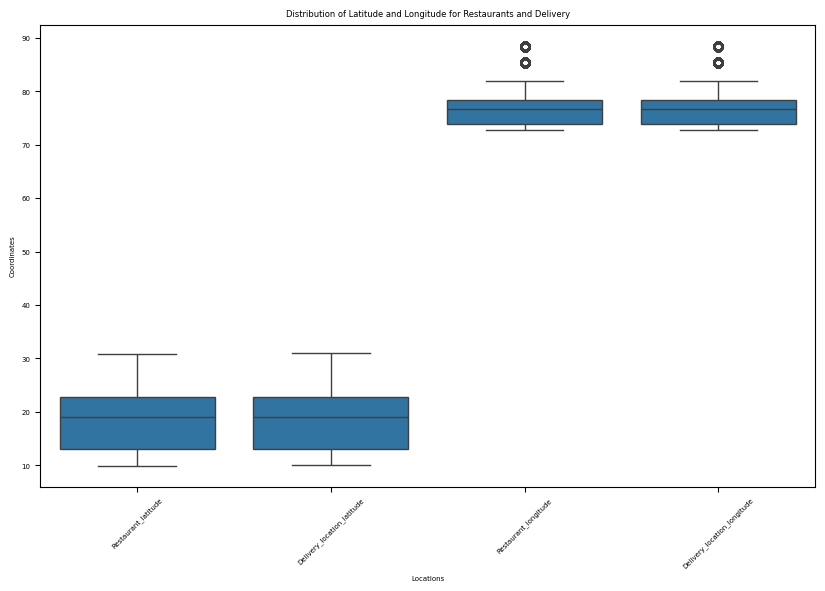

In [118]:
# Melt the DataFrame to long format

import matplotlib.pyplot as plt
import seaborn as sns

plot_loc = filtered_df.melt(value_vars=['Restaurant_latitude', 'Delivery_location_latitude', 'Restaurant_longitude', 'Delivery_location_longitude'])

plt.figure(figsize=(10, 6))  # Adjust the size based on your needs
sns.boxplot(x='variable', y='value', data= plot_loc)
plt.ylabel('Coordinates')
plt.xlabel('Locations')
plt.title('Distribution of Latitude and Longitude for Restaurants and Delivery')
plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.show()


# Dropping unwanted columns

In [119]:
#DROPPING THE ORDER, DELIVERY ID

filtered_df = filtered_df.drop(['ID', 'Delivery_person_ID','Time_taken(min)','Weatherconditions','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude'], axis=1)
filtered_df

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,order_prepare_time,delivery_city,weather_condition,delivery_time_taken_min,distance
0,37.0,4.9,High,2,Snack,motorcycle,0.0,No,Urban,15.0,INDO,Sunny,24.0,3.020737
1,34.0,4.5,Jam,2,Snack,scooter,1.0,No,Metropolitian,5.0,BANG,Stormy,33.0,20.143737
2,23.0,4.4,Low,0,Drinks,motorcycle,1.0,No,Urban,15.0,BANG,Sandstorms,26.0,1.549693
3,38.0,4.7,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,10.0,COIMB,Sunny,21.0,7.774497
4,32.0,4.6,High,1,Snack,scooter,1.0,No,Metropolitian,15.0,CHEN,Cloudy,30.0,6.197898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45587,35.0,4.2,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,10.0,RANCHI,Windy,33.0,16.576800
45588,30.0,4.8,High,1,Meal,motorcycle,0.0,No,Metropolitian,10.0,JAP,Windy,32.0,1.488112
45590,30.0,4.9,Low,1,Drinks,scooter,0.0,No,Metropolitian,15.0,CHEN,Cloudy,16.0,4.648024
45591,20.0,4.7,High,0,Snack,motorcycle,1.0,No,Metropolitian,5.0,COIMB,Cloudy,26.0,6.219668


# Train Test Splitting

In [120]:
from sklearn.model_selection import train_test_split

col = ['Delivery_person_Age', 'Delivery_person_Ratings',
       'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
       'distance', 'order_prepare_time', 'Type_of_order_Buffet ',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'City_Metropolitian ', 'City_Semi-Urban ', 'City_Urban ',
       'weather_condition_Cloudy', 'weather_condition_Fog',
       'weather_condition_Sandstorms', 'weather_condition_Stormy',
       'weather_condition_Sunny', 'weather_condition_Windy',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'delivery_city_AGR', 'delivery_city_ALH',
       'delivery_city_AURG', 'delivery_city_BANG', 'delivery_city_BHP',
       'delivery_city_CHEN', 'delivery_city_COIMB', 'delivery_city_DEH',
       'delivery_city_GOA', 'delivery_city_HYD', 'delivery_city_INDO',
       'delivery_city_JAP', 'delivery_city_KNP', 'delivery_city_KOC',
       'delivery_city_KOL', 'delivery_city_LUDH', 'delivery_city_MUM',
       'delivery_city_MYS', 'delivery_city_PUNE', 'delivery_city_RANCHI',
       'delivery_city_SUR', 'delivery_city_VAD', 'Festival']

X = filtered_df.drop('delivery_time_taken_min', axis = 1)
y = filtered_df['delivery_time_taken_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Creating full combined train set (X-train + y_train) for dexcriptive analysis

In [121]:
train_combined = pd.concat([X_train, pd.Series(y_train, name='delivery_time_taken_min')], axis=1)


# Descriptive Analysis

## Summary statistics

In [249]:
summary_stats = train_combined.describe()
summary_stats

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,order_prepare_time,distance,delivery_time_taken_min
count,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000
mean,29.599459,4.631259,0.991627,0.750346,9.968682,9.732604,26.568504
std,5.764855,0.316980,0.818349,0.573494,4.084986,5.586247,9.336868
min,20.000000,2.500000,0.000000,0.000000,5.000000,1.463837,10.000000
25%,25.000000,4.500000,0.000000,0.000000,5.000000,4.648799,19.000000
50%,30.000000,4.700000,1.000000,1.000000,10.000000,9.203394,26.000000
75%,35.000000,4.900000,2.000000,1.000000,15.000000,13.660086,33.000000
max,39.000000,5.000000,2.000000,3.000000,15.000000,20.942906,54.000000


In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 5

def plot_data_bar_plot(df, column_name, title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=column_name, palette="Oranges")
    plt.title(f'Barplot of {column_name}', fontsize=title_size)
    plt.ylabel('Count', fontsize=axis_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_histogram(df, column_name, title_size=14, axis_size=12, tick_size=10, bins = 5):
    plt.figure(figsize=(13, 4))
    sns.histplot(df[column_name],bins = bins, color = 'orange')
    plt.title(f'Histogram of {column_name}', fontsize=title_size)
    plt.xlabel(column_name, fontsize=axis_size)
    plt.ylabel('Frequency', fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_boxplot(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")
    #sns.color_palette("Spectral", as_cmap=True)
    plt.title(f'Boxplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

def plot_data_scatter(df, column_name1,column_name2 ,title_size=14, axis_size=12, tick_size=10):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column_name1],y=df[column_name2],color = 'orange')
    plt.title(f'Scatterplot of {column_name1} with {column_name2}', fontsize=title_size)
    plt.xlabel(column_name1, fontsize=axis_size)
    plt.ylabel(column_name2, fontsize=axis_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.show()

### Barplots

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


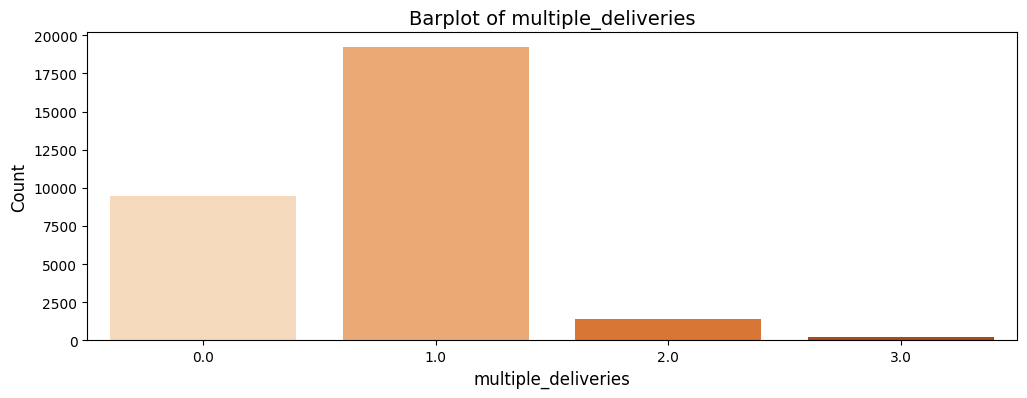

In [251]:
plot_data_bar_plot(train_combined, 'multiple_deliveries')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


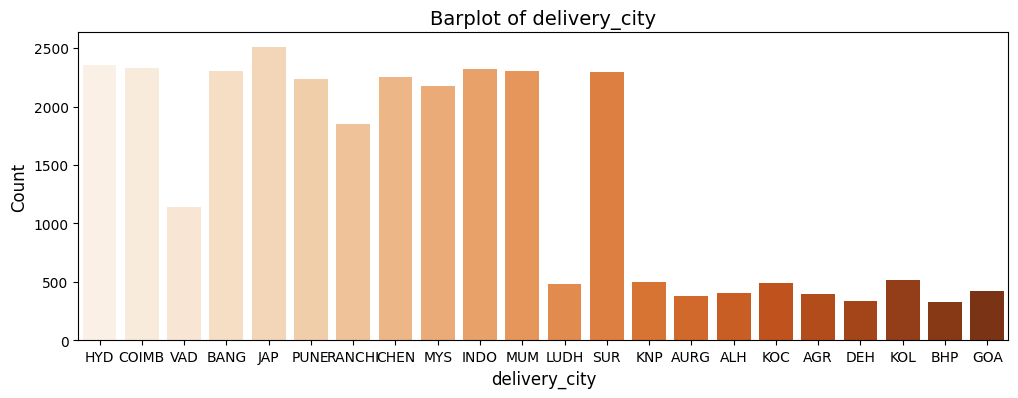

In [252]:
plot_data_bar_plot(train_combined, 'delivery_city')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


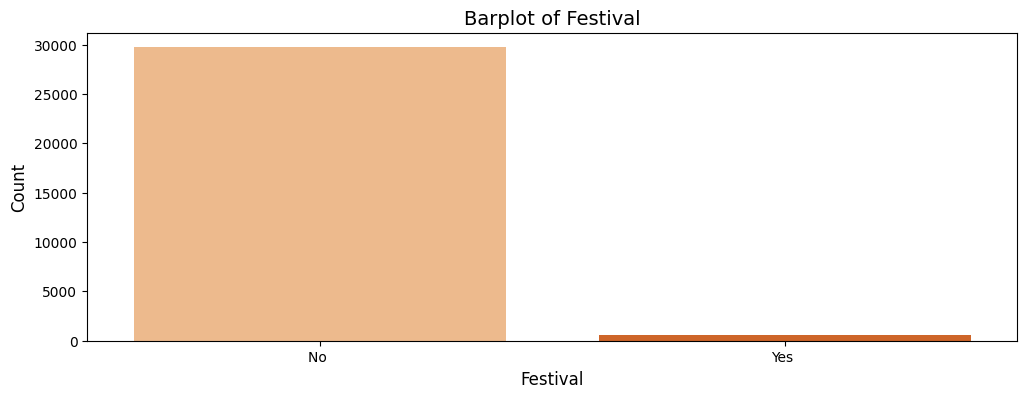

In [253]:
plot_data_bar_plot(train_combined, 'Festival')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


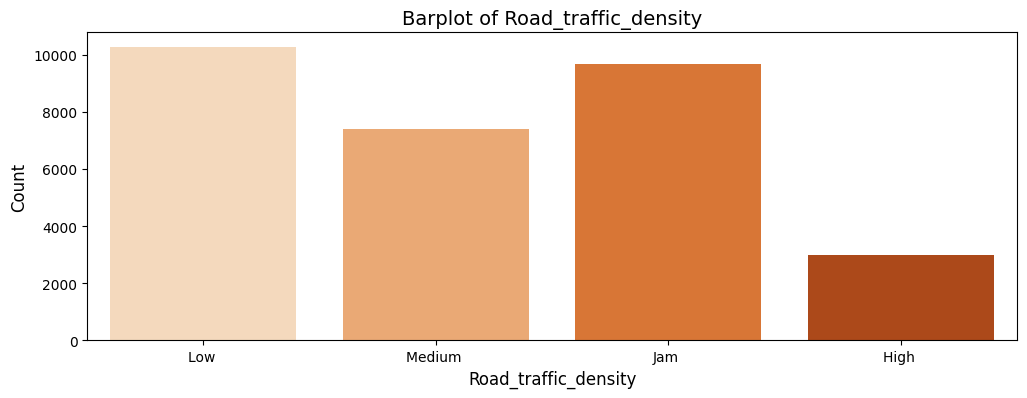

In [254]:
plot_data_bar_plot(train_combined, 'Road_traffic_density')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


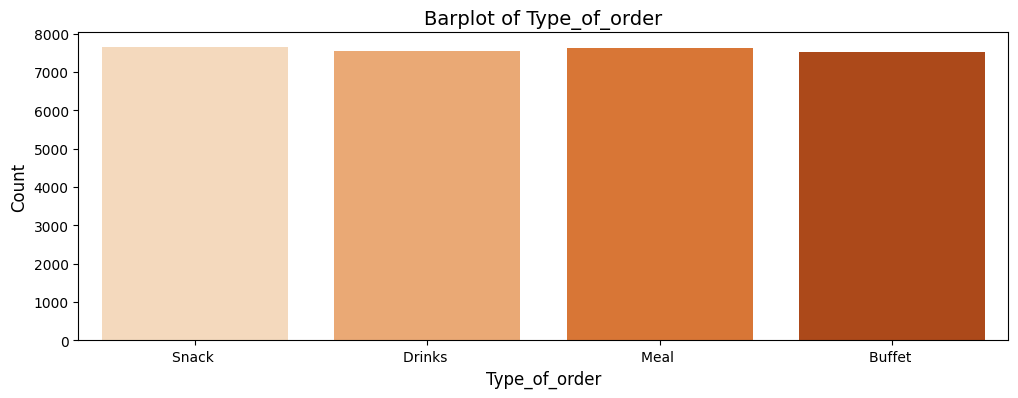

In [255]:
plot_data_bar_plot(train_combined, 'Type_of_order')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


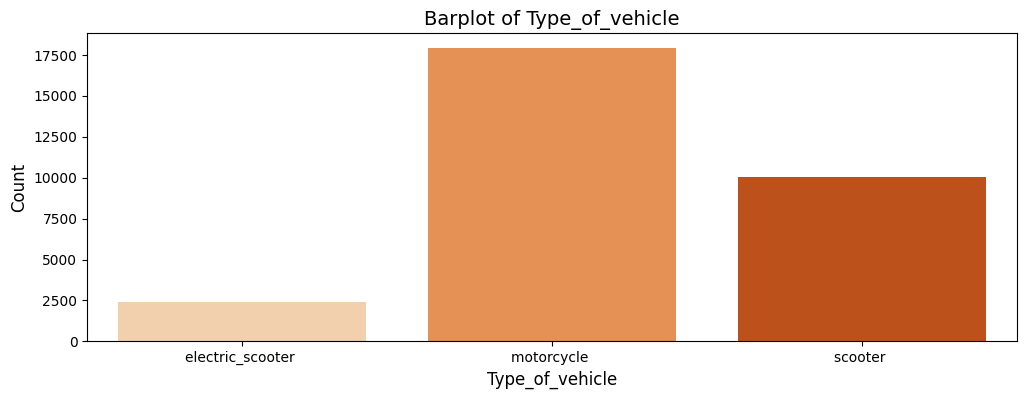

In [256]:
plot_data_bar_plot(train_combined, 'Type_of_vehicle')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


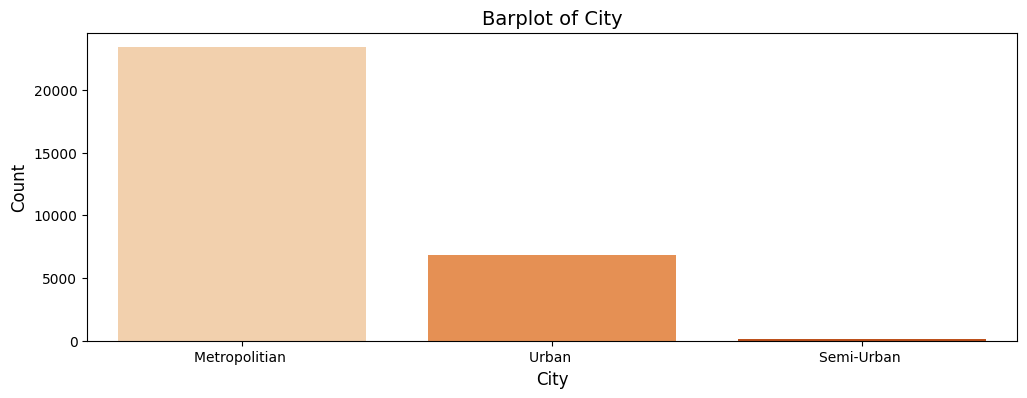

In [257]:
plot_data_bar_plot(train_combined, 'City')

<ipython-input-250-c96aed6351d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Oranges")


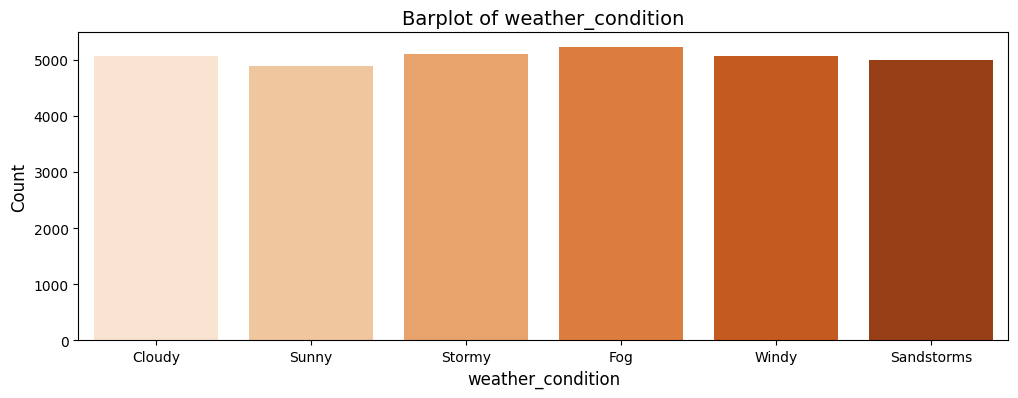

In [258]:
plot_data_bar_plot(train_combined, 'weather_condition')

### Histograms

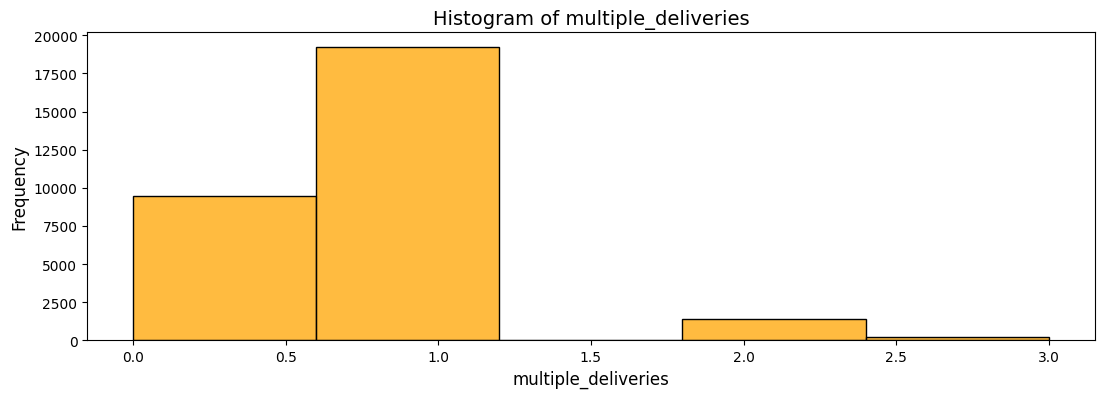

In [296]:
plot_data_histogram(train_combined, 'multiple_deliveries')

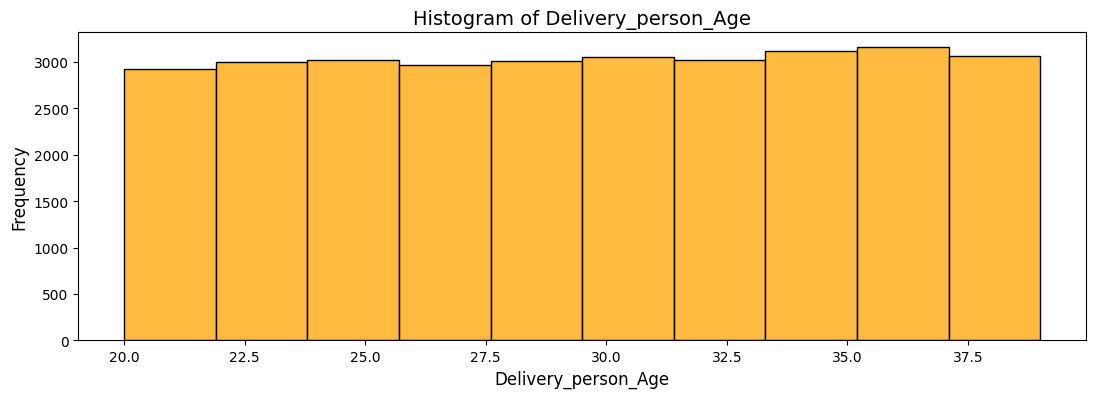

In [260]:
plot_data_histogram(train_combined, 'Delivery_person_Age',bins = 10)

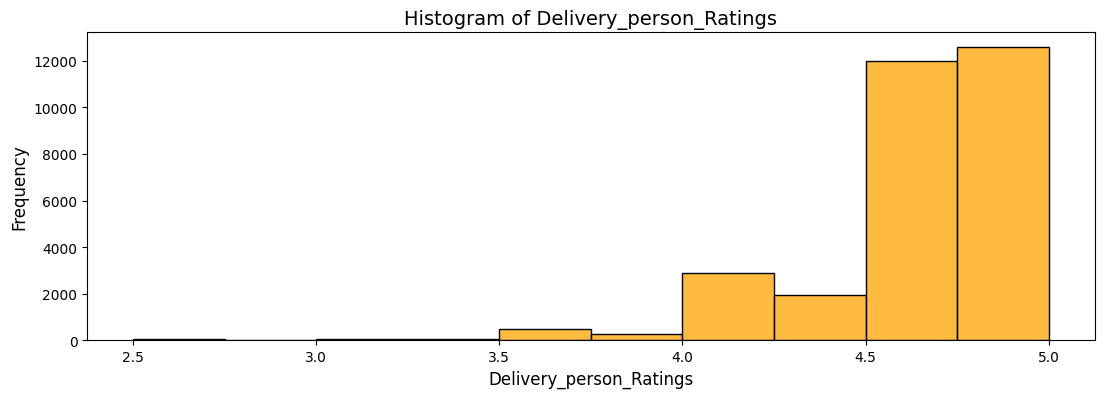

In [261]:
plot_data_histogram(train_combined, 'Delivery_person_Ratings', bins =10)

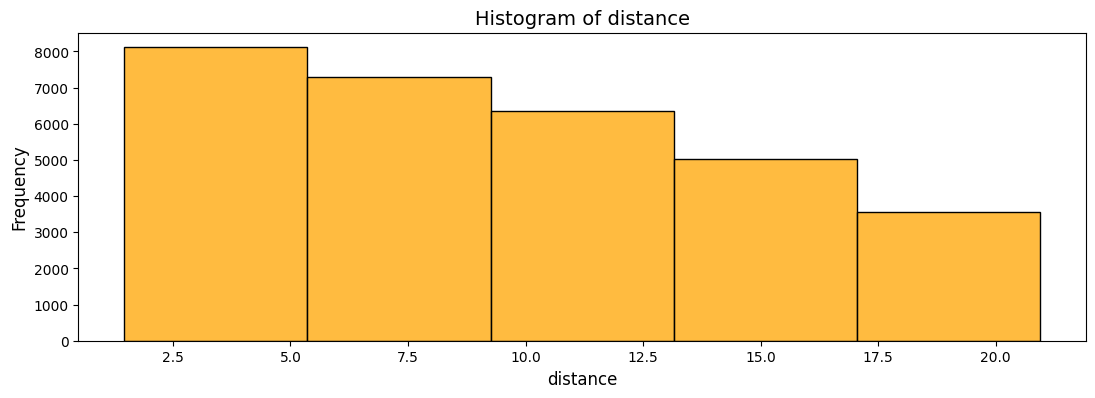

In [262]:
plot_data_histogram(train_combined, 'distance', bins = 5)

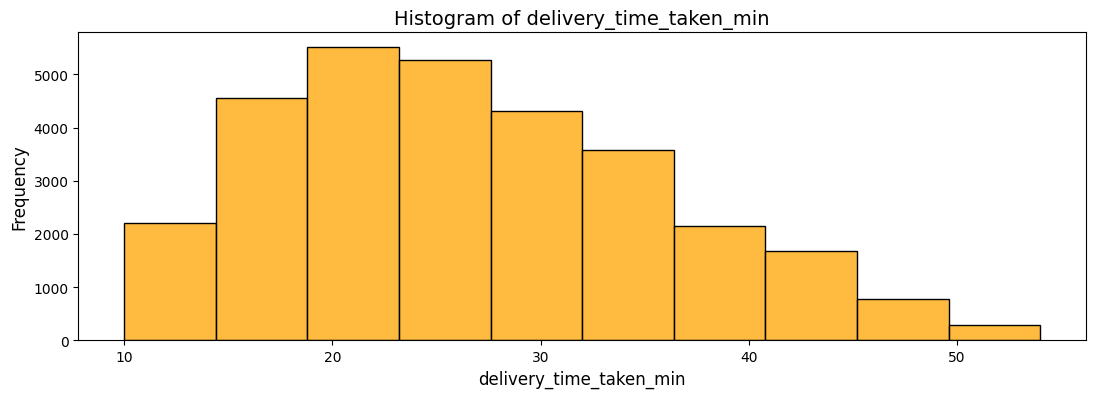

In [263]:
plot_data_histogram(train_combined, 'delivery_time_taken_min', bins=10)


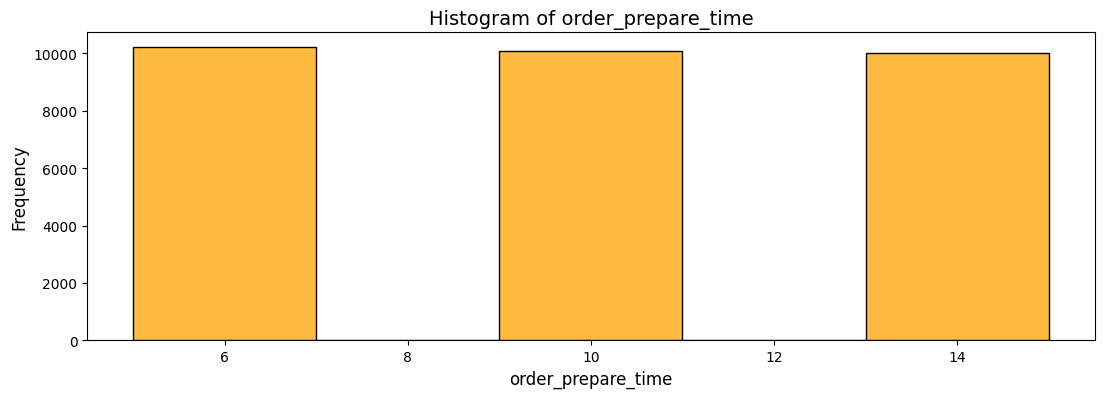

In [264]:
plot_data_histogram(train_combined, 'order_prepare_time') #Only 3 values 5,10,15

### Boxplots for numerical predictors

In [265]:
def boxplot_univariate (col_name, title_size = 12, axis_size = 10):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=X_train[col_name], palette="husl")
    plt.title(f'Boxplot of {col_name}', fontsize=title_size)
    plt.ylabel(col_name, fontsize=axis_size)
    plt.show()

<ipython-input-265-57e1625af050>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=X_train[col_name], palette="husl")


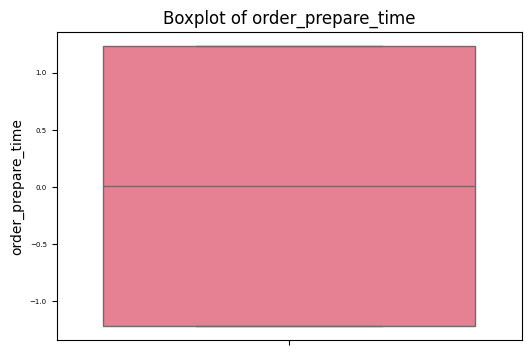

In [266]:
boxplot_univariate('order_prepare_time')

<ipython-input-265-57e1625af050>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=X_train[col_name], palette="husl")


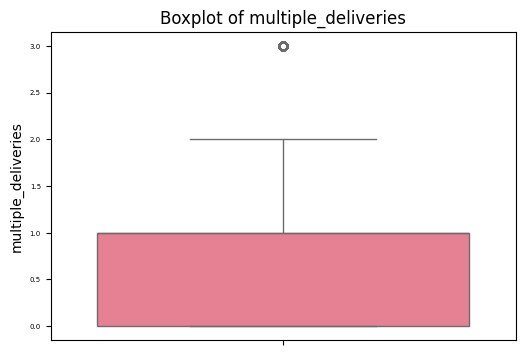

In [267]:
boxplot_univariate('multiple_deliveries')

### Boxplots with response

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


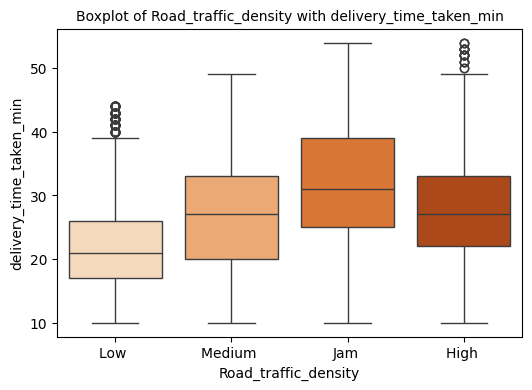

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


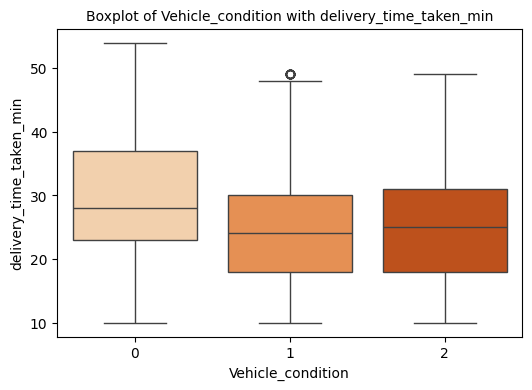

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


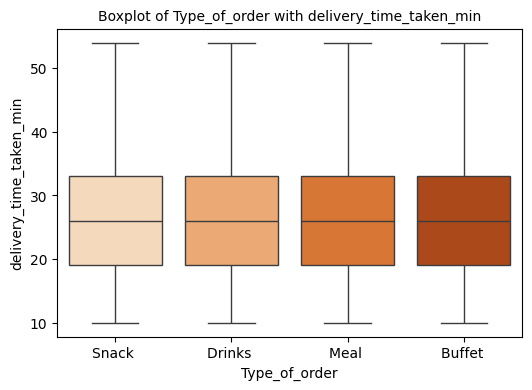

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


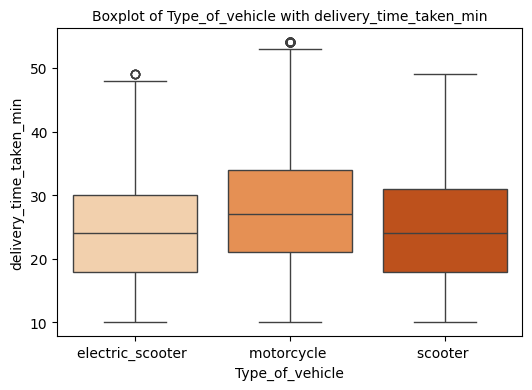

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


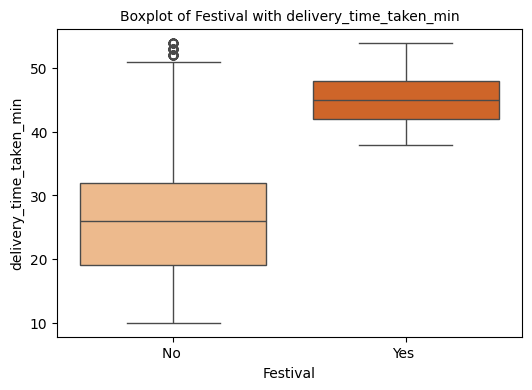

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


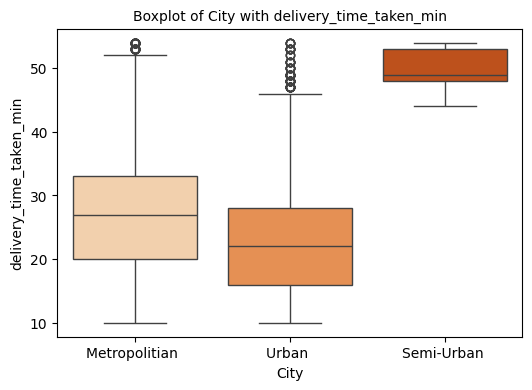

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


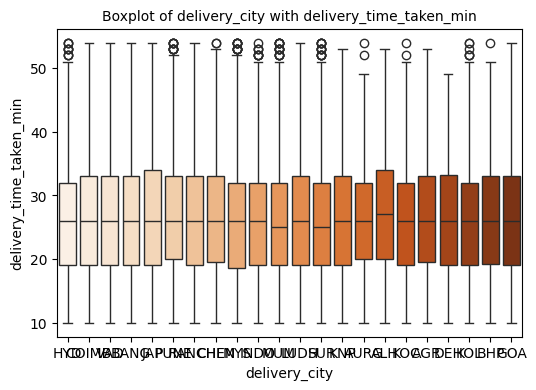

<ipython-input-250-c96aed6351d6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name1],y=df[column_name2],palette="Oranges")


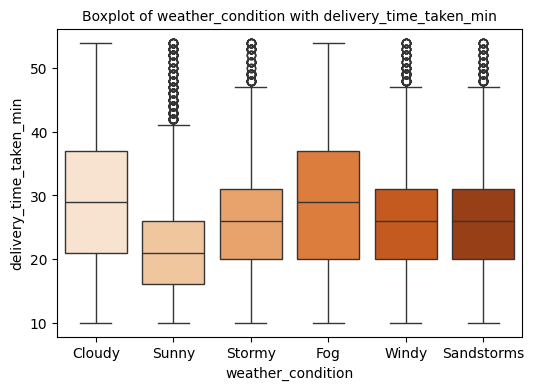

In [268]:
filtered_df1 = train_combined

plot_data_boxplot(filtered_df1,'Road_traffic_density','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'Vehicle_condition','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10,)
plot_data_boxplot(filtered_df1,'Type_of_order','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'Type_of_vehicle','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'Festival','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'City','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'delivery_city','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
#plot_data_boxplot(filtered_df1,'restaurant_num','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
#plot_data_boxplot(filtered_df1,'delivery_num','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)
plot_data_boxplot(filtered_df1,'weather_condition','delivery_time_taken_min', title_size=10, axis_size=10, tick_size=10)


## Scatter plots

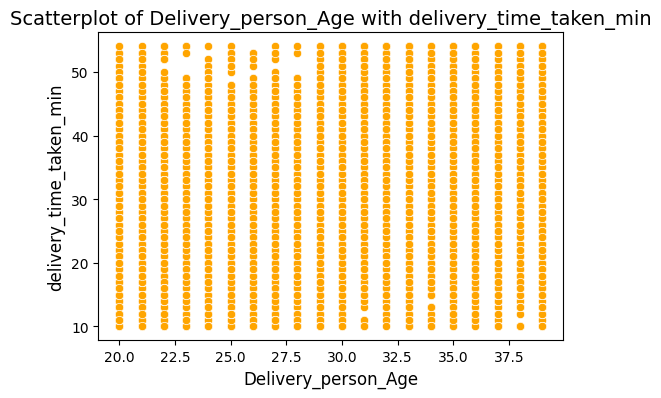

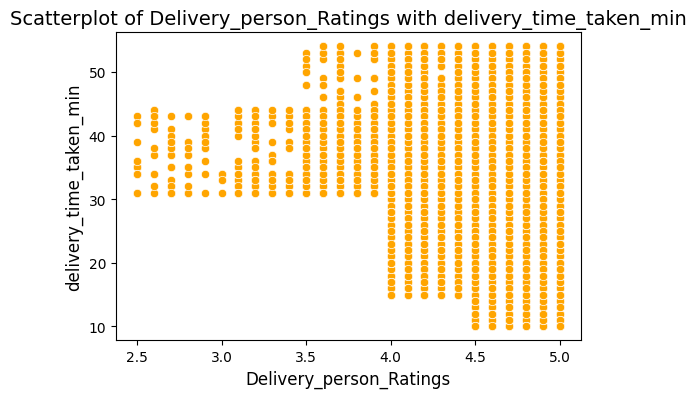

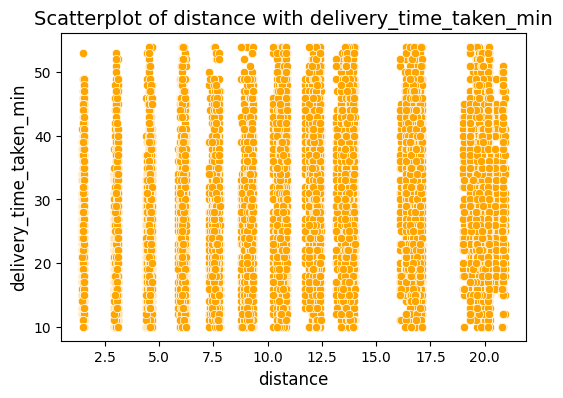

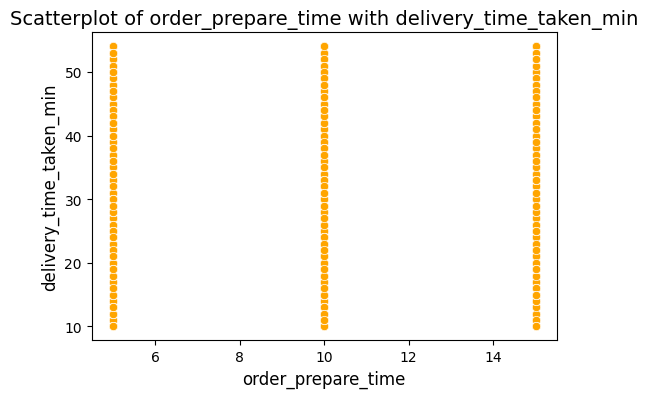

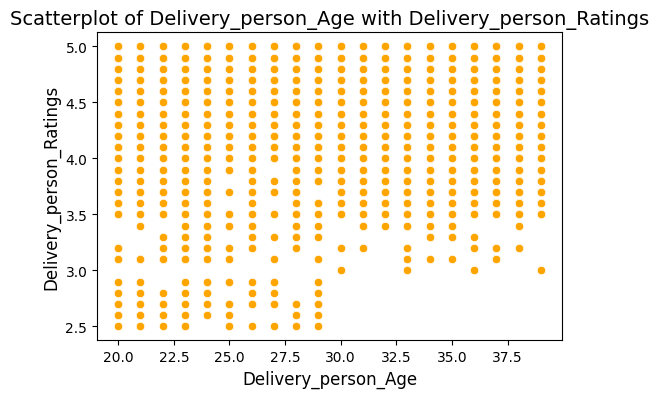

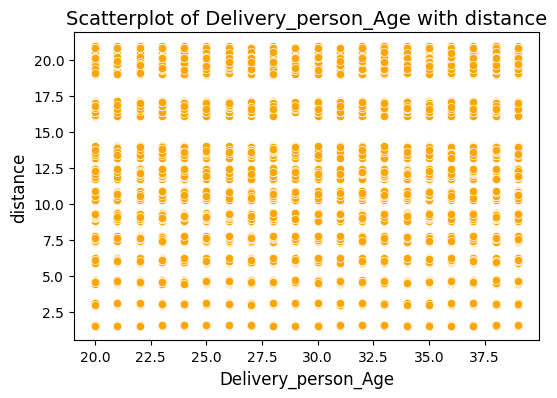

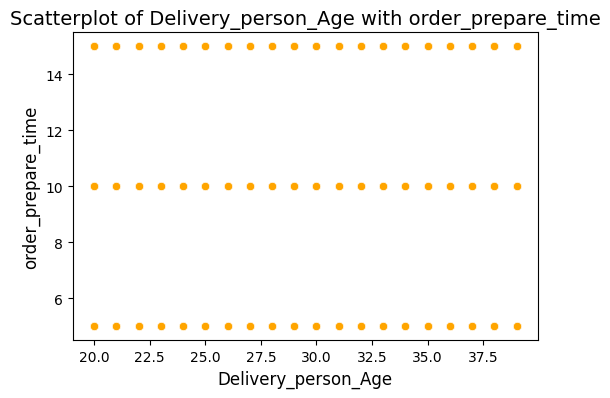

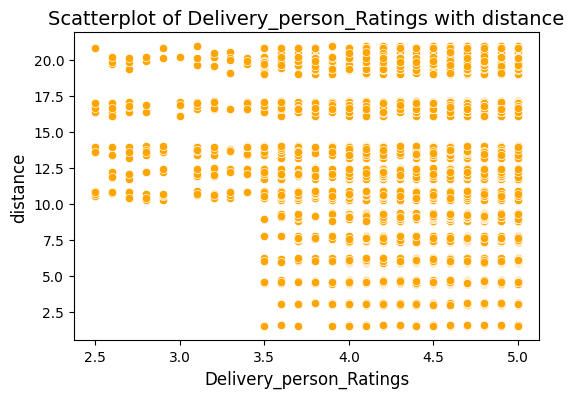

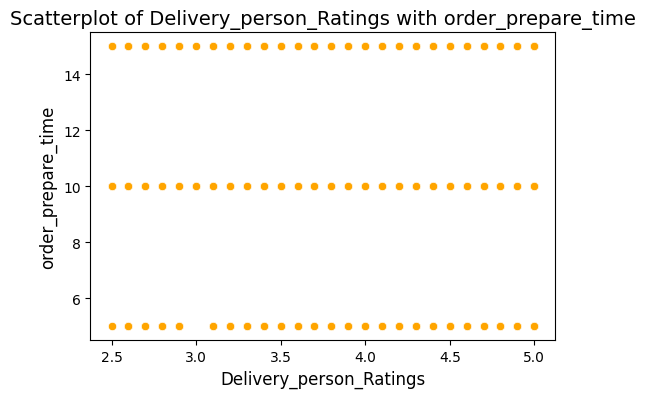

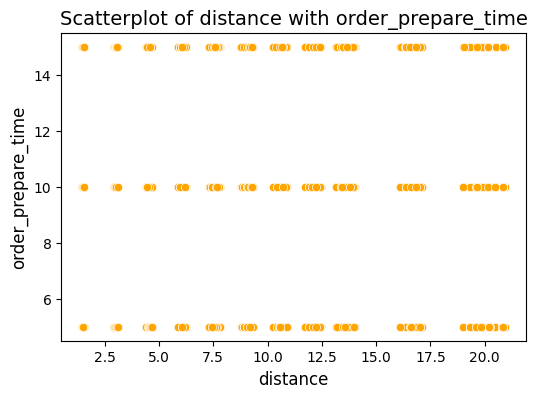

In [269]:

plot_data_scatter(filtered_df1,'Delivery_person_Age','delivery_time_taken_min' )
plot_data_scatter(filtered_df1,'Delivery_person_Ratings','delivery_time_taken_min' )
plot_data_scatter(filtered_df1,'distance','delivery_time_taken_min' )
plot_data_scatter(filtered_df1,'order_prepare_time','delivery_time_taken_min' )
plot_data_scatter(filtered_df1,'Delivery_person_Age','Delivery_person_Ratings' )
plot_data_scatter(filtered_df1,'Delivery_person_Age','distance' )
plot_data_scatter(filtered_df1,'Delivery_person_Age','order_prepare_time' )
plot_data_scatter(filtered_df1,'Delivery_person_Ratings','distance' )
plot_data_scatter(filtered_df1,'Delivery_person_Ratings','order_prepare_time' )
plot_data_scatter(filtered_df1,'distance','order_prepare_time' )


## Correlation plots

### Numerical Vs Numerical

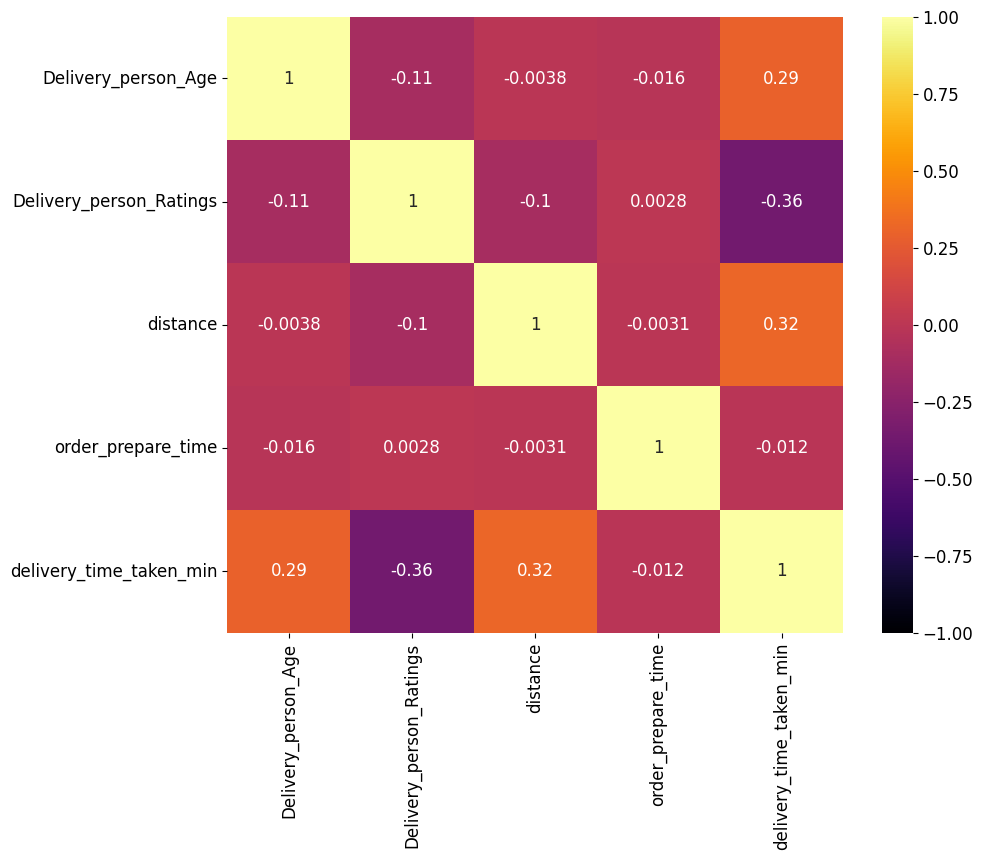

In [270]:
set1_num = filtered_df1[['Delivery_person_Age', 'Delivery_person_Ratings','distance','order_prepare_time', 'delivery_time_taken_min']]


# Compute the correlation matrix
correlation_matrix = set1_num.corr()


# Generate a heatmap
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1, center=0, square=True)
plt.show()

### Categorical Vs Categorical

In [271]:
#Correlations between categorical vs categorical
from itertools import combinations
import scipy.stats as stats
categorical_predictors = filtered_df1[['Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'delivery_city',
       'weather_condition','multiple_deliveries']]
categorical_predictors = categorical_predictors.columns.tolist()

combs = combinations(categorical_predictors, 2)

for comb in combs:
    contingency_table = pd.crosstab(filtered_df[comb[0]], filtered_df[comb[1]])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Combination: {comb}")
    print(f"Chi2 value: {chi2}, p-value: {p}\n")

Combination: ('Vehicle_condition', 'Type_of_order')
Chi2 value: 8.108973361857586, p-value: 0.23022788908474626

Combination: ('Vehicle_condition', 'Type_of_vehicle')
Chi2 value: 18670.15639442978, p-value: 0.0

Combination: ('Vehicle_condition', 'Festival')
Chi2 value: 399.97609514383254, p-value: 1.400536697568961e-87

Combination: ('Vehicle_condition', 'City')
Chi2 value: 304.5681340816267, p-value: 1.1203843074295695e-64

Combination: ('Vehicle_condition', 'delivery_city')
Chi2 value: 28.12940699134196, p-value: 0.9502155360662237

Combination: ('Vehicle_condition', 'weather_condition')
Chi2 value: 5.033848872014369, p-value: 0.8889054322269127

Combination: ('Vehicle_condition', 'multiple_deliveries')
Chi2 value: 667.9038447231152, p-value: 5.193518966283343e-141

Combination: ('Type_of_order', 'Type_of_vehicle')
Chi2 value: 4.470909444131709, p-value: 0.6132229108542038

Combination: ('Type_of_order', 'Festival')
Chi2 value: 3.7585469913425387, p-value: 0.288744769256686

Combina

### Categorical Vs Numerical

In [272]:
#When examining the relationship between a numerical variable and a categorical variable,
#some common approaches include ANOVA (if the categorical variable has more than two levels)
#or Point-Biserial Correlation (if the categorical variable is binary).

Numerical_predictors = filtered_df1[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance','order_prepare_time','delivery_time_taken_min']]
numerical_vars = Numerical_predictors.columns.tolist()
categorical_vars = categorical_predictors
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # Check if categorical variable is binary
        if filtered_df1[cat_var].nunique() == 2:
            # Compute Point-Biserial Correlation
            corr, p = stats.pointbiserialr(filtered_df1[num_var], filtered_df1[cat_var].astype('category').cat.codes)
            print(f"Point-Biserial Correlation between {num_var} and {cat_var}:")
            print(f"Correlation: {corr}, p-value: {p}\n")
        else:
            # Compute ANOVA
            groups = [filtered_df1[num_var][filtered_df1[cat_var] == cat] for cat in filtered_df1[cat_var].unique()]
            fvalue, pvalue = stats.f_oneway(*groups)
            print(f"ANOVA between {num_var} and {cat_var}:")
            print(f"F-value: {fvalue}, p-value: {pvalue}\n")


ANOVA between Delivery_person_Age and Vehicle_condition:
F-value: 0.6225793820554317, p-value: 0.5365655179849613

ANOVA between Delivery_person_Age and Type_of_order:
F-value: 0.9072269544878903, p-value: 0.43656846118891013

ANOVA between Delivery_person_Age and Type_of_vehicle:
F-value: 0.22254446043109283, p-value: 0.8004807233500352

Point-Biserial Correlation between Delivery_person_Age and Festival:
Correlation: 0.057733683355028584, p-value: 8.029614083793966e-24

ANOVA between Delivery_person_Age and City:
F-value: 68.49779660727444, p-value: 2.083363110133768e-30

ANOVA between Delivery_person_Age and delivery_city:
F-value: 0.924959204620086, p-value: 0.5579603698915131

ANOVA between Delivery_person_Age and weather_condition:
F-value: 1.5119495022257008, p-value: 0.1822620139008187

ANOVA between Delivery_person_Age and multiple_deliveries:
F-value: 139.29789318384255, p-value: 1.2177370727803599e-89

ANOVA between Delivery_person_Ratings and Vehicle_condition:
F-value: 57.

## PLS AND MCA

In [273]:
pip install prince


In [274]:
import prince
from prince import MCA

In [275]:
#Making a dataframe with the numerical predictors
Numerical_predictors = filtered_df1[['Delivery_person_Age', 'Delivery_person_Ratings','distance','order_prepare_time']]
Numerical_predictors

,Delivery_person_Age,Delivery_person_Ratings,distance,order_prepare_time
33233,38.0,3.5,10.737155,15.0
6696,33.0,4.9,13.993521,15.0
33163,37.0,4.9,3.025054,15.0
24410,36.0,4.8,6.198170,5.0
20996,20.0,4.6,4.464027,5.0
...,...,...,...,...
24833,22.0,4.8,10.706184,10.0
38576,23.0,5.0,4.588615,15.0
36530,22.0,4.9,10.572376,5.0
25412,37.0,4.9,6.045366,5.0


In [276]:
#Scaling the numerical data
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
pred_to_scale = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance','order_prepare_time']

Numerical_predictors[pred_to_scale] = scaler.fit_transform(Numerical_predictors[pred_to_scale])

Numerical_predictors


<ipython-input-276-6830a5a64c78>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numerical_predictors[pred_to_scale] = scaler.fit_transform(Numerical_predictors[pred_to_scale])


,Delivery_person_Age,Delivery_person_Ratings,distance,order_prepare_time
33233,1.457223,-3.568928,0.179829,1.231681
6696,0.589884,0.847833,0.762764,1.231681
33163,1.283755,0.847833,-1.200745,1.231681
24410,1.110287,0.532350,-0.632713,-1.216348
20996,-1.665197,-0.098616,-0.943149,-1.216348
...,...,...,...,...
24833,-1.318261,0.532350,0.174285,0.007667
38576,-1.144793,1.163316,-0.920846,1.231681
36530,-1.318261,0.847833,0.150331,-1.216348
25412,1.283755,0.847833,-0.660067,-1.216348


In [277]:
#Making a dataframe with the categorical(nominal) predictors
Mca_predictors = filtered_df1[['Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'delivery_city',
       'weather_condition','multiple_deliveries']]

Mca_predictors

,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,delivery_city,weather_condition,multiple_deliveries
33233,2,Snack,electric_scooter,No,Metropolitian,HYD,Cloudy,1.0
6696,2,Snack,motorcycle,No,Metropolitian,COIMB,Sunny,0.0
33163,1,Snack,motorcycle,No,Metropolitian,VAD,Stormy,0.0
24410,0,Drinks,motorcycle,No,Metropolitian,BANG,Fog,1.0
20996,0,Meal,motorcycle,No,Metropolitian,JAP,Windy,1.0
...,...,...,...,...,...,...,...,...
24833,2,Meal,motorcycle,No,Metropolitian,PUNE,Sunny,0.0
38576,0,Buffet,motorcycle,No,Metropolitian,PUNE,Sunny,0.0
36530,2,Meal,motorcycle,No,Metropolitian,INDO,Cloudy,1.0
25412,0,Snack,motorcycle,No,Metropolitian,KOL,Stormy,1.0


In [278]:
# Apply MCA to nominal variables
mca = MCA(n_components=2)
mca_coords = mca.fit_transform(Mca_predictors)

In [279]:
# Combine MCA coordinates with numerical predictors
X_transformed= pd.concat([Numerical_predictors, mca_coords], axis=1)

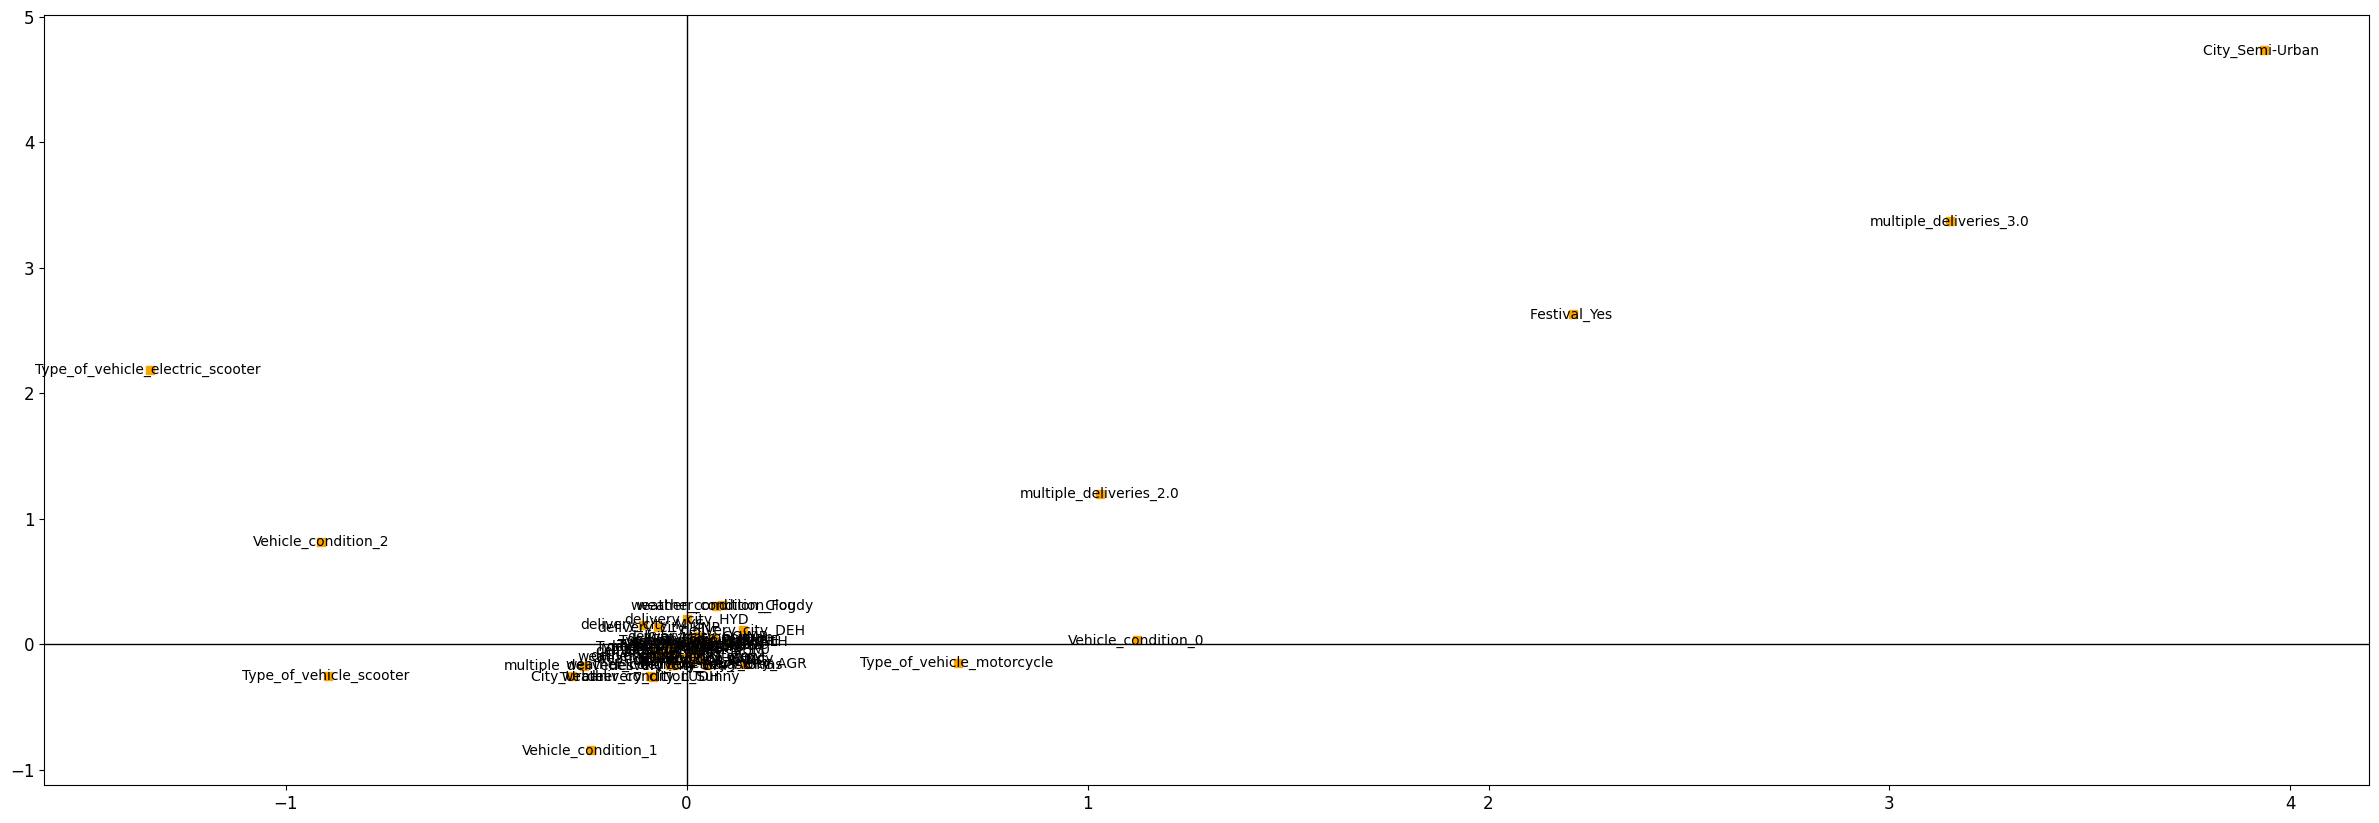

In [280]:
# Extract categories from column_coords dataframe
column_coords = mca.column_coordinates(Mca_predictors)
categories = column_coords.index
plt.figure(figsize=(30,10))
plt.axhline(0, color='black',linewidth=1.0)
plt.axvline(0, color='black',linewidth=1.0)
# Loop through and plot
for j, (x, y) in enumerate(column_coords.values):  # enumerate through values and row indices
    plt.scatter(x, y, marker='s', color='orange')
    plt.text(x, y, categories[j], color='black', ha='center', va='center', fontsize=10)


In [281]:
# Eigenvalues (Inertia for each component)
eigenvalues = mca.eigenvalues_
print("Eigenvalues (Inertia):", eigenvalues)

# Total inertia
total_inertia = mca.total_inertia_
print("Total Inertia:", total_inertia)

# Explained inertia
explained_inertia = mca.eigenvalues_
total_inertia = sum(explained_inertia)
proportion_explained = [value / total_inertia for value in explained_inertia]
#proportion_explained list will give you the fraction of total variance that each MCA dimension captures.
print("variance explained : ", proportion_explained*100)

# Row coordinates (can be large if dataset is large)
row_coordinates = mca.row_coordinates(Mca_predictors)
print("Row Coordinates:\n", row_coordinates.head())  # Just showing top few for brevity

# Column coordinates
column_coordinates = mca.column_coordinates(Mca_predictors)
print("Column Coordinates:\n", column_coordinates.head())  #

Eigenvalues (Inertia): [0.21708606 0.16751364]
Total Inertia: 4.875000000000032
variance explained :  [0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568135, 0.5644467787543187, 0.43555322124568

### Partial Least Squares with the MCA components

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

# Sample data (replace this with your own dataset)
X = X_transformed
y = filtered_df1['delivery_time_taken_min']

X.columns = X.columns.astype(str)

# Create and fit the PLS model
model1 = PLSRegression(n_components=2)
model1.fit(X, y)

# Summary of the PLS model (equivalent to summary(model1) in R)
print("PLS Summary:")
print("R-squared (calibration):", model1.score(X, y))
#print("R-squared (test):", model1.score(xt, yt))



PLS Summary:
R-squared (calibration): 0.4507286612491701


<Figure size 2000x1000 with 0 Axes>

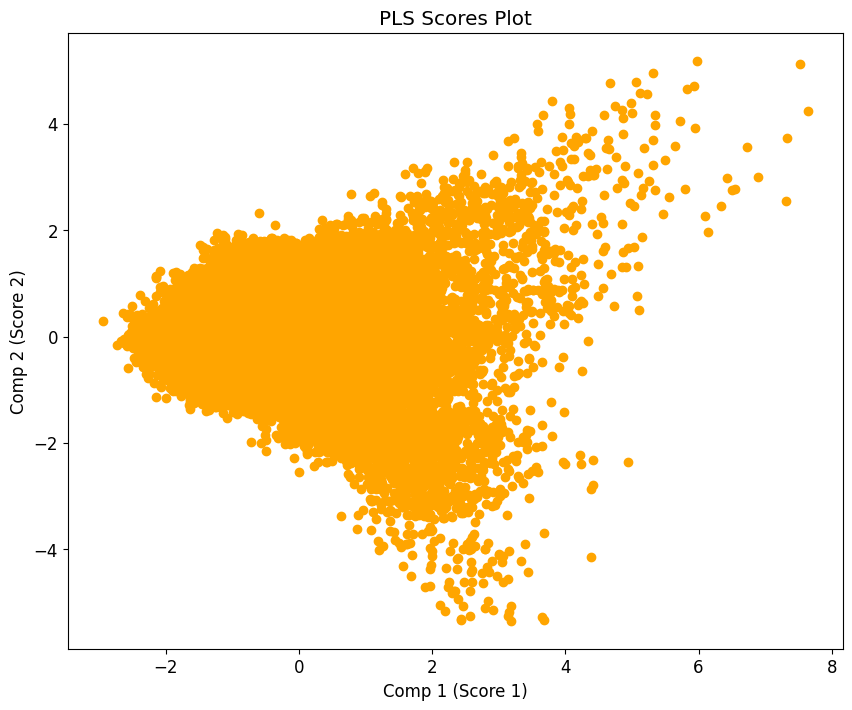

<Figure size 2000x1000 with 0 Axes>

In [283]:
#### Plot the PLS model
plt.figure(figsize=(10, 8))

plt.scatter(model1.x_scores_[:, 0], model1.x_scores_[:, 1], color='orange')
plt.xlabel('Comp 1 (Score 1)')
plt.ylabel('Comp 2 (Score 2)')
plt.title('PLS Scores Plot')
plt.figure(figsize=(20,10))





In [284]:
# Get the scores of the first two components
scores = model1.x_scores_[:, :2]

# Calculate the total variance of the input data
total_variance = np.var(X, axis=0).sum()

# Calculate the variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

# Calculate the proportion of variance explained by the first two components
variance_explained = scores_variance / total_variance

print(f"Variance explained by the first two components: {variance_explained * 100}%")


Variance explained by the first two components: 49.089181033248295%


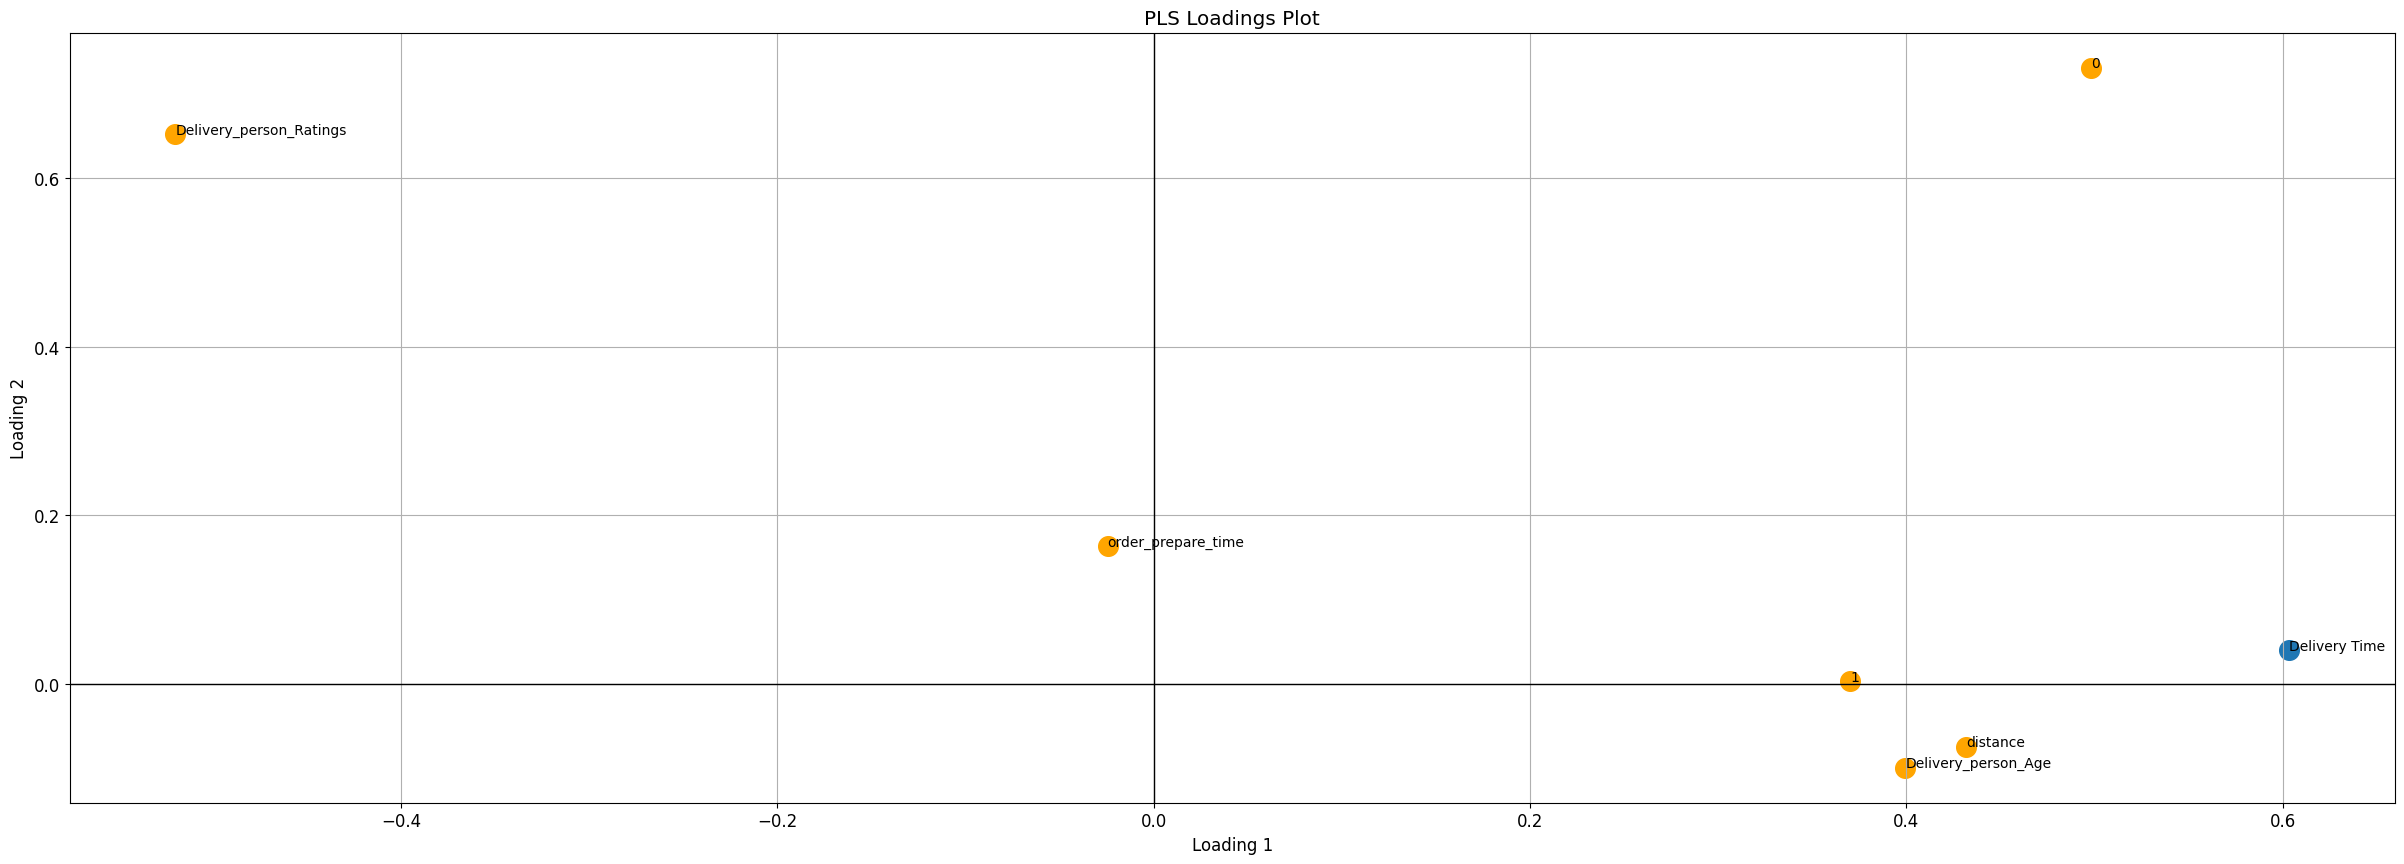

In [285]:
plt.figure(figsize=(30,10))
plt.scatter(model1.x_loadings_[:, 0], model1.x_loadings_[:, 1], s=200,color='orange')
plt.xlabel('Loading 1')
plt.ylabel('Loading 2')
plt.title('PLS Loadings Plot')
plt.rcParams['font.size'] = 10   # Set the default font size for all elements

# Annotate the data points with feature names
for i, feature_name in enumerate(X.columns):
    plt.annotate(feature_name, (model1.x_loadings_[i, 0], model1.x_loadings_[i, 1]))


plt.scatter(model1.y_loadings_[:, 0], model1.y_loadings_[:, 1], s = 200)
plt.annotate('Delivery Time', (model1.y_loadings_[:, 0], model1.y_loadings_[:, 1]))
plt.axhline(0, color='black',linewidth=1.0)
plt.axvline(0, color='black',linewidth=1.0)
plt.grid(True)
plt.show()

Excluding MCA components

In [286]:
model2 = PLSRegression(n_components=2)
model2.fit(Numerical_predictors, y)

# Get the scores of the first two components
scores = model2.x_scores_[:, :2]

# Calculate the total variance of the input data
total_variance = np.var(Numerical_predictors, axis=0).sum()

# Calculate the variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

# Calculate the proportion of variance explained by the first two components
variance_explained = scores_variance / total_variance

print(f"Variance explained by the first two components: {variance_explained * 100}%")


Variance explained by the first two components: 50.37871045989459%


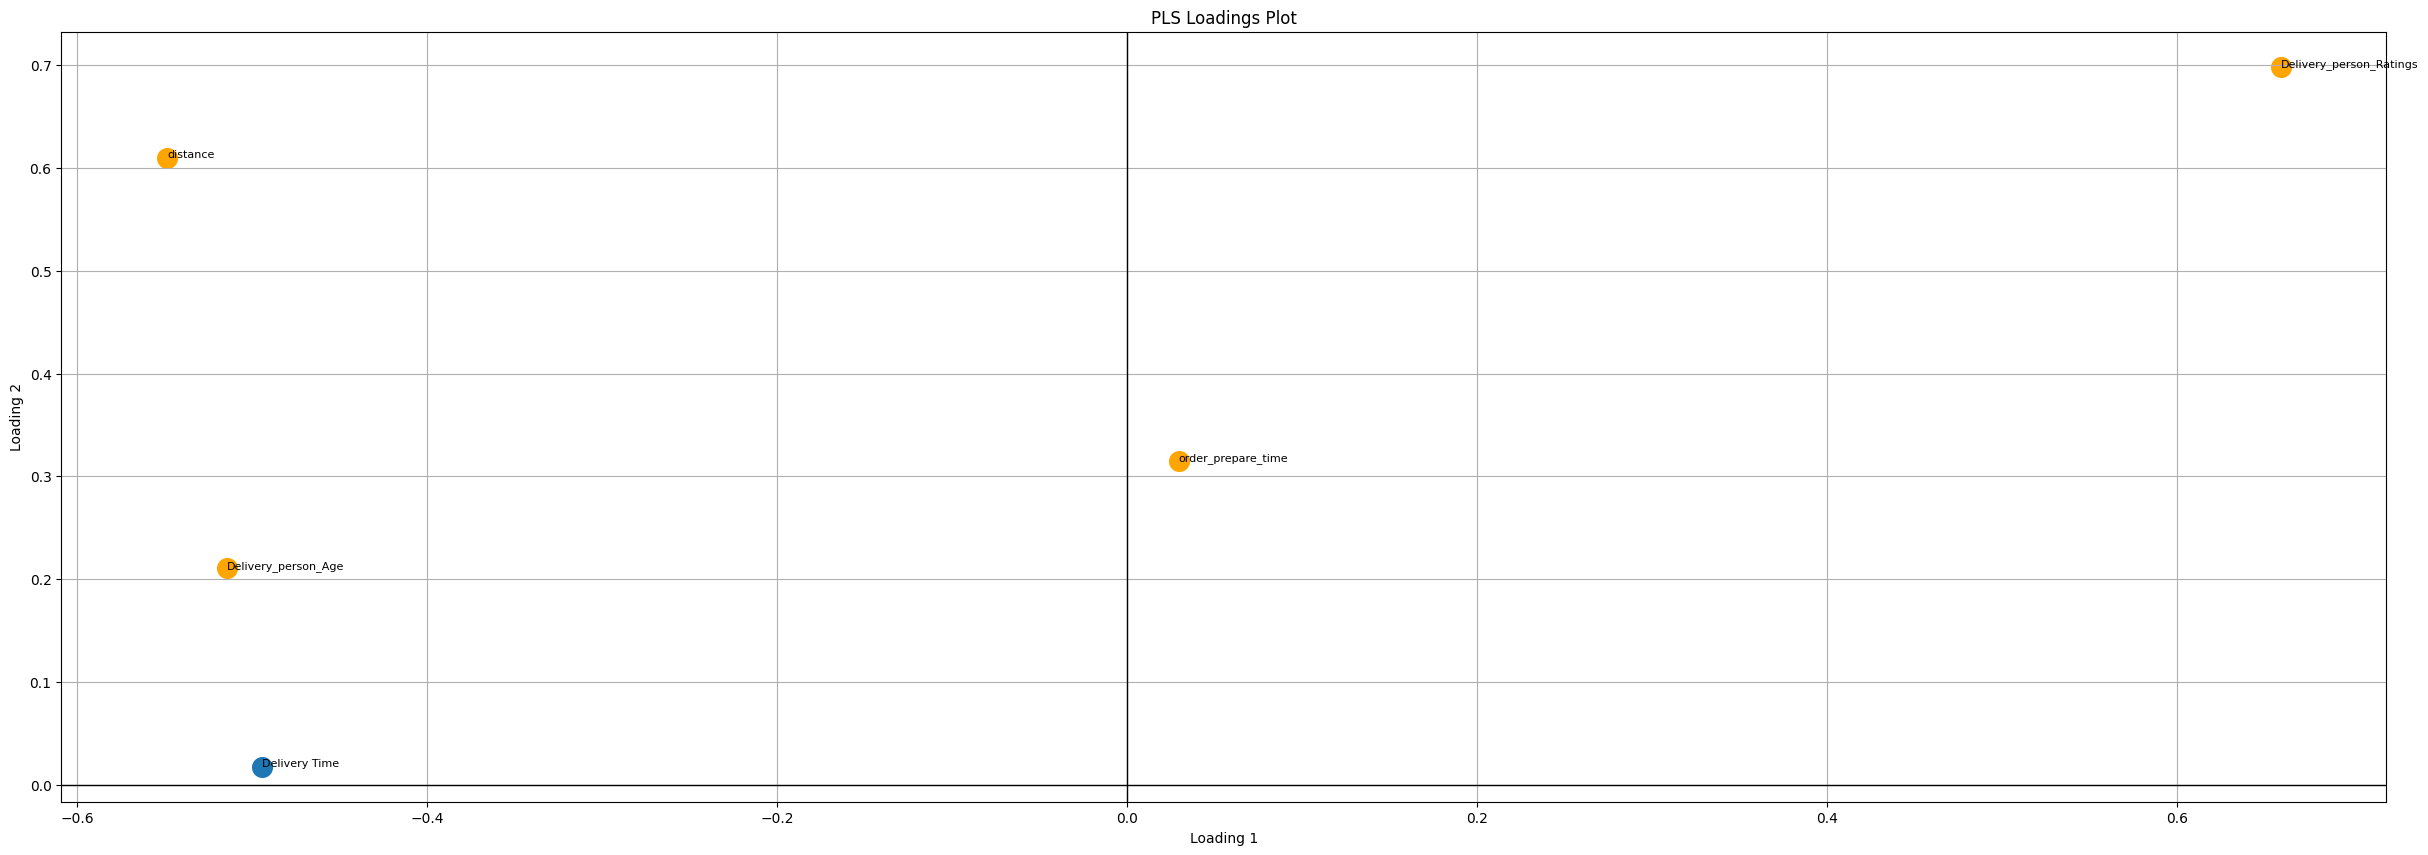

In [287]:
plt.figure(figsize=(30,10))
plt.scatter(model2.x_loadings_[:, 0], model2.x_loadings_[:, 1], s=200,color='orange')
plt.xlabel('Loading 1')
plt.ylabel('Loading 2')
plt.title('PLS Loadings Plot')
plt.rcParams['font.size'] = 8   # Set the default font size for all elements

# Annotate the data points with feature names
for i, feature_name in enumerate(Numerical_predictors.columns):
    plt.annotate(feature_name, (model2.x_loadings_[i, 0], model2.x_loadings_[i, 1]))

plt.scatter(model2.y_loadings_[:, 0], model2.y_loadings_[:, 1], s = 200)
plt.annotate('Delivery Time', (model2.y_loadings_[:, 0], model2.y_loadings_[:, 1]))
plt.axhline(0, color='black',linewidth=1.0)
plt.axvline(0, color='black',linewidth=1.0)
plt.grid(True)
plt.show()

## Outlier Detection using PLS

In [288]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
y_pred = cross_val_predict(model2, Numerical_predictors, y, cv=5)


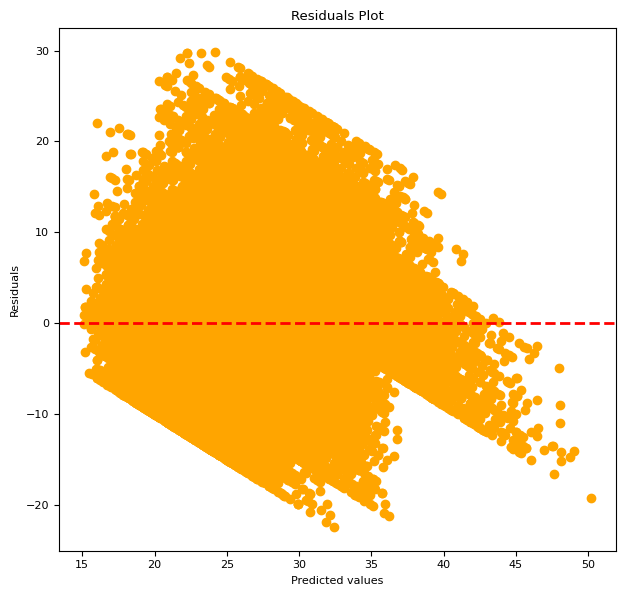

In [289]:
# Calculate standardized residuals
residuals = y - y_pred.flatten()
residuals_std = zscore(residuals)

# Mahalanobis distance
mahalanobis_distance = np.sqrt(np.sum(residuals_std**2))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred.flatten(), residuals,color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

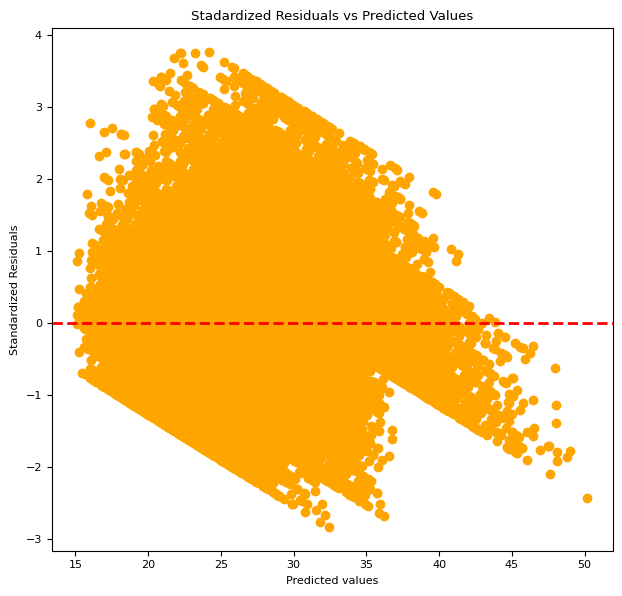

In [290]:
# Calculate standardized residuals
residuals = y - y_pred.flatten()
residuals_std = zscore(residuals)

# Mahalanobis distance
mahalanobis_distance = np.sqrt(np.sum(residuals_std**2))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred.flatten(), residuals_std,color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Stadardized Residuals vs Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

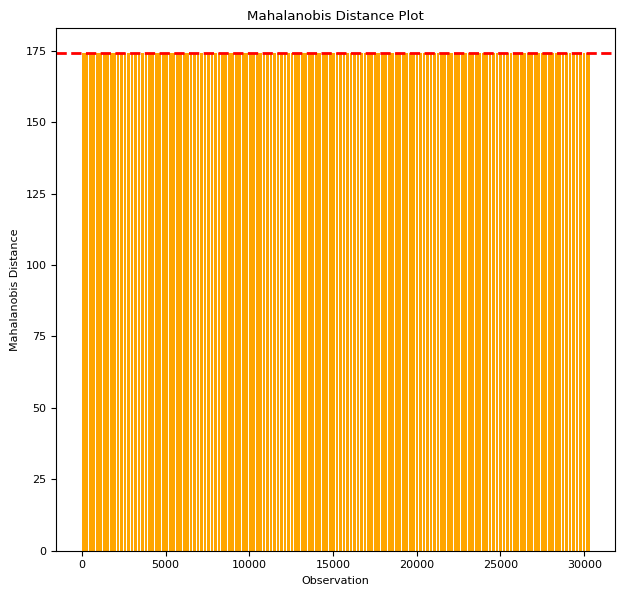

In [291]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(y)), mahalanobis_distance,color='orange')
plt.axhline(np.mean(mahalanobis_distance) + 3 * np.std(mahalanobis_distance), color='red', linestyle='--', linewidth=2)
plt.title('Mahalanobis Distance Plot')
plt.xlabel('Observation')
plt.ylabel('Mahalanobis Distance')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Standard Residuals')

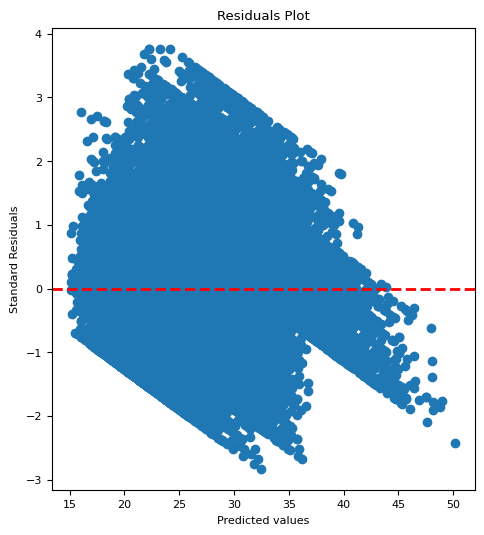

In [292]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred.flatten(), residuals_std)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Standard Residuals')

In [293]:
#Number of outlers
np.sum((residuals_std <= -3) | (residuals_std > 3))

119

In [294]:
# Indices of observations outside the range (-3, 3)
out_of_range_indices = np.where((residuals_std <= -3) | (residuals_std >= 3))[0]

print(f'Indices of observations outside the range [-3, 3]: {out_of_range_indices}')

Indices of observations outside the range [-3, 3]: [  577   729   800   898  1720  1750  1812  1910  2251  2294  2840  3344
  3699  3758  4265  4281  4486  4543  4768  5199  5290  5571  5575  5578
  5593  5730  6009  6067  6383  6718  6810  6821  7038  7132  7724  7742
  8043  8434  8503  8949  9027  9600  9763  9793 10226 10468 10547 10804
 10836 11090 11425 11437 11489 11785 11906 12547 12832 12866 13136 13560
 13632 13809 15224 16060 16205 16804 17089 17101 17403 18194 18257 18353
 18536 18603 18842 19039 19250 19500 19591 19749 19949 20215 20826 20878
 21112 21653 21654 21683 21961 21981 22311 22389 22543 22584 22721 22939
 23257 23778 24399 24486 24541 24636 25008 25137 25295 25736 25916 26145
 26188 26638 27099 27104 27175 28865 29257 29317 29462 29498 29644]


In [295]:
Numerical_predictors.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance',
       'order_prepare_time'],
      dtype='object')

# Advanced analysis




## Handling the categorical variables

In [169]:
X_train = pd.get_dummies(X_train, columns=['City'])
X_test = pd.get_dummies(X_test, columns=['City'])


X_train = pd.get_dummies(X_train, columns=['weather_condition'])
X_test = pd.get_dummies(X_test, columns=['weather_condition'])


X_train = pd.get_dummies(X_train, columns=['Type_of_vehicle'])
X_test = pd.get_dummies(X_test, columns=['Type_of_vehicle'])


X_train = pd.get_dummies(X_train, columns=['delivery_city'])
X_test = pd.get_dummies(X_test, columns=['delivery_city'])


X_train = pd.get_dummies(X_train, columns=['Type_of_order'])
X_test = pd.get_dummies(X_test, columns=['Type_of_order'])

#Vehicle condition is already encoded as 0,1,2

In [170]:
X_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings',
       'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
       'Festival', 'order_prepare_time', 'distance', 'City_Metropolitian ',
       'City_Semi-Urban ', 'City_Urban ', 'weather_condition_Cloudy',
       'weather_condition_Fog', 'weather_condition_Sandstorms',
       'weather_condition_Stormy', 'weather_condition_Sunny',
       'weather_condition_Windy', 'Type_of_vehicle_electric_scooter ',
       'Type_of_vehicle_motorcycle ', 'Type_of_vehicle_scooter ',
       'delivery_city_AGR', 'delivery_city_ALH', 'delivery_city_AURG',
       'delivery_city_BANG', 'delivery_city_BHP', 'delivery_city_CHEN',
       'delivery_city_COIMB', 'delivery_city_DEH', 'delivery_city_GOA',
       'delivery_city_HYD', 'delivery_city_INDO', 'delivery_city_JAP',
       'delivery_city_KNP', 'delivery_city_KOC', 'delivery_city_KOL',
       'delivery_city_LUDH', 'delivery_city_MUM', 'delivery_city_MYS',
       'delivery_city_PUNE', 'de

In [171]:
#filtered_df = pd.get_dummies(filtered_df, columns =['Festival'])

mapping2 = {
    'Yes ':1,
    'No ':0,

}
X_train['Festival'] = X_train['Festival'].map(mapping2)
X_test['Festival'] = X_test['Festival'].map(mapping2)

In [172]:
mapping1 = {
    'Low ':1,
    'Medium ':2,
    'High ':3,
    'Jam ':4,
}
X_train['Road_traffic_density'] = X_train['Road_traffic_density'].map(mapping1)
X_test['Road_traffic_density'] = X_test['Road_traffic_density'].map(mapping1)



## Scaling the numerical predictors

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming X_train and X_test are your training and test sets
# Assuming 'Delivery_person_Age', 'Delivery_person_Ratings', 'distance', 'order_prepare_time'
# are the columns you want to scale

num_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance', 'order_prepare_time']

# Extract the numerical predictors from the training set
num_set_train = X_train[num_columns]

# Extract the numerical predictors from the test set
num_set_test = X_test[num_columns]

# Fit the scaler on the training data and transform both the training and test data
X_train[num_columns] = scaler.fit_transform(num_set_train)
X_test[num_columns] = scaler.transform(num_set_test)


In [202]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,order_prepare_time,distance,City_Metropolitian,City_Semi-Urban,...,delivery_city_MUM,delivery_city_MYS,delivery_city_PUNE,delivery_city_RANCHI,delivery_city_SUR,delivery_city_VAD,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
33233,1.457223,-3.568928,1,2,1.0,0,1.231681,0.179829,True,False,...,False,False,False,False,False,False,False,False,False,True
6696,0.589884,0.847833,1,2,0.0,0,1.231681,0.762764,True,False,...,False,False,False,False,False,False,False,False,False,True
33163,1.283755,0.847833,1,1,0.0,0,1.231681,-1.200745,True,False,...,False,False,False,False,False,True,False,False,False,True
24410,1.110287,0.532350,2,0,1.0,0,-1.216348,-0.632713,True,False,...,False,False,False,False,False,False,False,True,False,False
20996,-1.665197,-0.098616,4,0,1.0,0,-1.216348,-0.943149,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24833,-1.318261,0.532350,2,2,0.0,0,0.007667,0.174285,True,False,...,False,False,True,False,False,False,False,False,True,False
38576,-1.144793,1.163316,2,0,0.0,0,1.231681,-0.920846,True,False,...,False,False,True,False,False,False,True,False,False,False
36530,-1.318261,0.847833,1,2,1.0,0,-1.216348,0.150331,True,False,...,False,False,False,False,False,False,False,False,True,False
25412,1.283755,0.847833,2,0,1.0,0,-1.216348,-0.660067,True,False,...,False,False,False,False,False,False,False,False,False,True


## Function to calculate MAPE

In [175]:
#Mean Absolute Percentage Error
def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Multiple Linear Regression

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Without outliers

In [177]:
out_of_range_indices

array([  577,   729,   800,   898,  1720,  1750,  1812,  1910,  2251,
        2294,  2840,  3344,  3699,  3758,  4265,  4281,  4486,  4543,
        4768,  5199,  5290,  5571,  5575,  5578,  5593,  5730,  6009,
        6067,  6383,  6718,  6810,  6821,  7038,  7132,  7724,  7742,
        8043,  8434,  8503,  8949,  9027,  9600,  9763,  9793, 10226,
       10468, 10547, 10804, 10836, 11090, 11425, 11437, 11489, 11785,
       11906, 12547, 12832, 12866, 13136, 13560, 13632, 13809, 15224,
       16060, 16205, 16804, 17089, 17101, 17403, 18194, 18257, 18353,
       18536, 18603, 18842, 19039, 19250, 19500, 19591, 19749, 19949,
       20215, 20826, 20878, 21112, 21653, 21654, 21683, 21961, 21981,
       22311, 22389, 22543, 22584, 22721, 22939, 23257, 23778, 24399,
       24486, 24541, 24636, 25008, 25137, 25295, 25736, 25916, 26145,
       26188, 26638, 27099, 27104, 27175, 28865, 29257, 29317, 29462,
       29498, 29644])

In [178]:
mask = np.ones(y_train.shape[0], dtype=bool)
mask[out_of_range_indices] = False

y_without_outliers = y_train[mask]


In [179]:
# Remove observations outside the range
mask1 = np.ones(X_train.shape[0], dtype=bool)
mask1[out_of_range_indices] = False

X_without_outliers= X_train[mask1]


In [180]:
30334-119

30215

In [181]:
linear_reg = LinearRegression()
linear_reg.fit(X_without_outliers,y_without_outliers)
y_test_pred_wo = linear_reg.predict(X_test)
y_train_pred_wo = linear_reg.predict(X_without_outliers)

In [182]:
print("The Test MSE is : ", mean_squared_error(y_test, y_test_pred_wo))
print("The Train MSE is : ", mean_squared_error(y_without_outliers, y_train_pred_wo))

print("The Test RMSE is : ", np.sqrt(mean_squared_error(y_test, y_test_pred_wo)))
print("The Train RMSE is : ", np.sqrt(mean_squared_error(y_without_outliers, y_train_pred_wo)))

print("The Test MAPE is : ", calculate_mape(y_test, y_test_pred_wo))
print("The Train MAPE is : ", calculate_mape(y_without_outliers, y_train_pred_wo))

print("The Test R-squared value is : ",r2_score(y_test, y_test_pred_wo))
print("The Train R-squared value is : ", r2_score(y_without_outliers, y_train_pred_wo))


The Test MSE is :  35.56426170584648
The Train MSE is :  34.900183179515416
The Test RMSE is :  5.96357792821109
The Train RMSE is :  5.907637698735038
The Test MAPE is :  20.670333859525403
The Train MAPE is :  20.813999289820643
The Test R-squared value is :  0.5903303045899442
The Train R-squared value is :  0.590023786702867


## With outliers

In [183]:
linear_reg1 = LinearRegression()

linear_reg1.fit(X_train,y_train)

y_test_pred = linear_reg1.predict(X_test)

y_train_pred = linear_reg1.predict(X_train)

In [184]:
print("The Test MSE is : ", mean_squared_error(y_test, y_test_pred))
print("The Train MSE is : ", mean_squared_error(y_train, y_train_pred))

The Test MSE is :  35.57101627202288
The Train MSE is :  35.71477833272482


In [185]:
print("The Test RMSE is : ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("The Train RMSE is : ", np.sqrt(mean_squared_error(y_train, y_train_pred)))


The Test RMSE is :  5.964144219586149
The Train RMSE is :  5.976184261945478


In [186]:
print("The Test MAPE is : ", calculate_mape(y_test, y_test_pred))
print("The Train MAPE is : ", calculate_mape(y_train, y_train_pred))

The Test MAPE is :  20.715234985874076
The Train MAPE is :  20.88182341726666


In [187]:
print("The Test R-squared value is : ",r2_score(y_test, y_test_pred))
print("The Train R-squared value is : ", r2_score(y_train, y_train_pred))


The Test R-squared value is :  0.5902524977992112
The Train R-squared value is :  0.5903057867232687


In [188]:
print("Coefficient:", linear_reg1.coef_)


Coefficient: [ 2.16636397e+00 -2.34282768e+00  2.31499418e+00 -2.14342950e+00
  3.01037232e+00  9.38327536e+00 -2.97437001e-02  1.76128387e+00
  4.85830583e+10  4.85830583e+10  4.85830583e+10 -1.29251102e+10
 -1.29251102e+10 -1.29251102e+10 -1.29251102e+10 -1.29251102e+10
 -1.29251102e+10 -7.64396507e+10 -7.64396507e+10 -7.64396507e+10
  1.16928502e+09  1.16928502e+09  1.16928502e+09  1.16928502e+09
  1.16928502e+09  1.16928502e+09  1.16928502e+09  1.16928502e+09
  1.16928502e+09  1.16928502e+09  1.16928502e+09  1.16928502e+09
  1.16928502e+09  1.16928502e+09  1.16928502e+09  1.16928502e+09
  1.16928502e+09  1.16928502e+09  1.16928502e+09  1.16928502e+09
  1.16928502e+09  1.16928502e+09 -4.83531588e+10 -4.83531588e+10
 -4.83531588e+10 -4.83531588e+10]


# Ridge Regression

In [189]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)



Ridge(alpha=0.5)

In [190]:
y_pred_ridge1= ridge.predict(X_test)
# Calculate the Mean Squared Error for test set
mse_ridge1 = mean_squared_error(y_test, y_pred_ridge1)
print("Mean Squared Error on Test Set:", mse_ridge1)

y_pred_ridge2 = ridge.predict(X_train)

Mean Squared Error on Test Set: 35.57105606891083


In [191]:
print("The Test MSE is : ", mean_squared_error(y_test, y_pred_ridge1))
print("The Train MSE is : ", mean_squared_error(y_train, y_pred_ridge2))

print("The Test RMSE is : ", np.sqrt(mean_squared_error(y_test, y_pred_ridge1)))
print("The Train RMSE is : ", np.sqrt(mean_squared_error(y_train, y_pred_ridge2)))

print("The Test MAPE is : ", calculate_mape(y_test, y_pred_ridge1))
print("The Train MAPE is : ", calculate_mape(y_train, y_pred_ridge2))

print("The Test R-squared value is : ",r2_score(y_test, y_pred_ridge1))
print("The Train R-squared value is : ", r2_score(y_train, y_pred_ridge2))


The Test MSE is :  35.57105606891083
The Train MSE is :  35.71478295893093
The Test RMSE is :  5.964147555930422
The Train RMSE is :  5.976184648998969
The Test MAPE is :  20.715432444962484
The Train MAPE is :  20.882028626658677
The Test R-squared value is :  0.5902520393733033
The Train R-squared value is :  0.5903057336547642


# Lasso Regression

In [192]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
model = LassoCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=-1)

# fit model
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488921.12620147667, tolerance: 238.01737384249057
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective di

LassoCV(alphas=array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055,...
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [193]:

y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

In [194]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.005000


In [195]:
print("The Test MSE is : ", mean_squared_error(y_test, y_test_pred))
print("The Train MSE is : ", mean_squared_error(y_train, y_train_pred))

The Test MSE is :  35.56917751328492
The Train MSE is :  35.73599067606785


In [196]:
print("The Test RMSE is : ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("The Train RMSE is : ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

The Test RMSE is :  5.963990066497841
The Train RMSE is :  5.977958738237313


In [197]:
print("The Test MAPE is : ", calculate_mape(y_test, y_test_pred))
print("The Train MAPE is : ", calculate_mape(y_train, y_train_pred))

The Test MAPE is :  20.71565894475015
The Train MAPE is :  20.895267047022212


In [198]:
print("The Test R-squared value is : ",r2_score(y_test, y_test_pred))
print("The Train R-squared value is : ", r2_score(y_train, y_train_pred))

The Test R-squared value is :  0.5902736787178071
The Train R-squared value is :  0.5900624539987389


# Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

In [204]:
# Define the hyperparameters and the range of values for each (simplified for faster execution)
param_dist_rf= {
    'n_estimators':  np.arange(100, 1000, 50),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 15, 20 ],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4 , 6 ,8, 10, 12],
    'bootstrap': [True]
}



In [208]:
# Use RandomizedSearchCV to search for best hyperparameters (reduced n_iter and cv for faster execution)
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter= 20,  # Reduced for speed
    cv=5,  # Reduced for speed
    verbose=1,
    n_jobs=-1,
    random_state=42)

In [209]:
# Fit the model
random_search_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10,
                                                             12],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   random_state=42, verbose=1)

In [222]:
rf = RandomForestRegressor(n_estimators = 600,
                           min_samples_split = 15,
                           min_samples_leaf = 10,
                           max_features = 100,
                           max_depth =  10 ,
                           bootstrap = True)

In [223]:
# Print the best parameters
#print("Best Parameters:", random_search_rf.best_params_)

rf.fit(X_train,y_train)

# Predict on test set
y_pred_rf1 = rf.predict(X_test)

# Calculate the Mean Squared Error
mse_rf1 = mean_squared_error(y_test, y_pred_rf1)
print("Mean Squared Error on Test Set:", mse_rf1)



# Predict on train set
y_pred_rf2 = rf.predict(X_train)

# Calculate the Mean Squared Error
mse_rf2 = mean_squared_error(y_train, y_pred_rf2)
print("Mean Squared Error on Train Set:", mse_rf2)

Mean Squared Error on Test Set: 14.63163129386152
Mean Squared Error on Train Set: 13.884858967463336


In [224]:
print("The Test MAPE is : ", calculate_mape(y_test, y_pred_rf1))
print("The Train MAPE is : ", calculate_mape(y_train, y_pred_rf2))

The Test MAPE is :  13.186542996527928
The Train MAPE is :  12.862616540317209


In [225]:
print("The Test R-squared value is : ",r2_score(y_test, y_pred_rf1))
print("The Train R-squared value is : ", r2_score(y_train, y_pred_rf2))

The Test R-squared value is :  0.8314561965299253
The Train R-squared value is :  0.8407228985677073


# XGBoost

In [ ]:
import xgboost as xgb

# Create an XGBoost Regressor
xgbr = xgb.XGBRegressor()



In [ ]:
# Define the hyperparameters and the range of values for each
param_dist_xgb = {
    'n_estimators': np.arange(100, 1000, 50),
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 10),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'subsample': np.linspace(0.5, 1, 6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 10]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_xgb= RandomizedSearchCV(
    xgbr,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)



In [ ]:
# Fit the model
random_search_xgb.fit(X_train, y_train)



In [ ]:
# Print the best parameters
print("Best Parameters:", random_search_xgb.best_params_)

In [ ]:
# Predict on the test set
y_pred_xg1 = random_search_xgb.predict(X_test)

# Calculate the Mean Squared Error
mse1 = mean_squared_error(y_test, y_pred_xg1)
print("Mean Squared Error on Test Set:", mse1)

# Predict on the train set
y_pred_xg2 = random_search_xgb.predict(X_train)

# Calculate the Mean Squared Error
mse2 = mean_squared_error(y_train, y_pred_xg2)
print("Mean Squared Error on Train Set:", mse2)

#Mape values
print("The Test MAPE is : ", calculate_mape(y_test, y_pred_xg1))
print("The Train MAPE is : ", calculate_mape(y_train, y_pred_xg2))

In [ ]:
print("The Test R-squared value is : ",r2_score(y_test, y_pred_xg1))
print("The Train  R-squared value is : ", r2_score(y_train,y_pred_xg2))

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling the data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#Already scaled the variables earlier
X_train_scaled = X_train
X_test_scaled = X_test

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN Regressor
knnr = KNeighborsRegressor()

# Define the hyperparameters and the range of values for each
param_dist_knn = {
    'n_neighbors': np.arange(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': np.arange(10, 30),
    'p': [1, 2]
}



In [ ]:
# Use RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(
    knnr,
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
# Fit the model
random_search_knn.fit(X_train_scaled, y_train)

In [ ]:
# Print the best parameters
print("Best Parameters:", random_search_knn.best_params_)

# Predict on the test set
y_pred_knn1 = random_search_knn.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse_knn1= mean_squared_error(y_test, y_pred_knn1)
print("Mean Squared Error on Test Set:", mse_knn1)



# Predict on the train set
y_pred_knn2 = random_search_knn.predict(X_train_scaled)

# Calculate the Mean Squared Error
mse_knn2 = mean_squared_error(y_train, y_pred_knn2)
print("Mean Squared Error on Train Set:", mse_knn2)

In [ ]:
print("The Test MAPE is : ", calculate_mape(y_test, y_pred_knn1))
print("The Train MAPE is : ", calculate_mape(y_train, y_pred_knn2))

In [ ]:
print("The Test R-squared value is : ",r2_score(y_test, y_pred_knn1))
print("The Train R-squared value is : ", r2_score(y_train, y_pred_knn2))

# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# Create an SVR model
svr = SVR()

# Define the hyperparameters and the range of values for each
param_dist_SVR = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient
    'degree': np.arange(1, 4),  # Degree of the polynomial kernel ('poly'). Ignored by all other kernels.
    'epsilon': np.linspace(0.05, 1, 10)  # Epsilon in the epsilon-SVR model
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_SVR = RandomizedSearchCV(
    svr,
    param_distributions=param_dist_SVR,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
# Fit the model
random_search_SVR.fit(X_train, y_train)


In [ ]:
# Print the best parameters
print("Best Parameters:", random_search_SVR.best_params_)

# Predict on the test set
y_pred_SVR1 = random_search_SVR.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse_SVR1 = mean_squared_error(y_test, y_pred_SVR1)
print("Mean Squared Error on Test Set:", mse_SVR1)

# Predict on the train set
y_pred_SVR2 = random_search_SVR.predict(X_train_scaled)

# Calculate the Mean Squared Error
mse_SVR2 = mean_squared_error(y_train, y_pred_SVR2)
print("Mean Squared Error on Train Set:", mse_SVR2)

# Variable Importance Plot

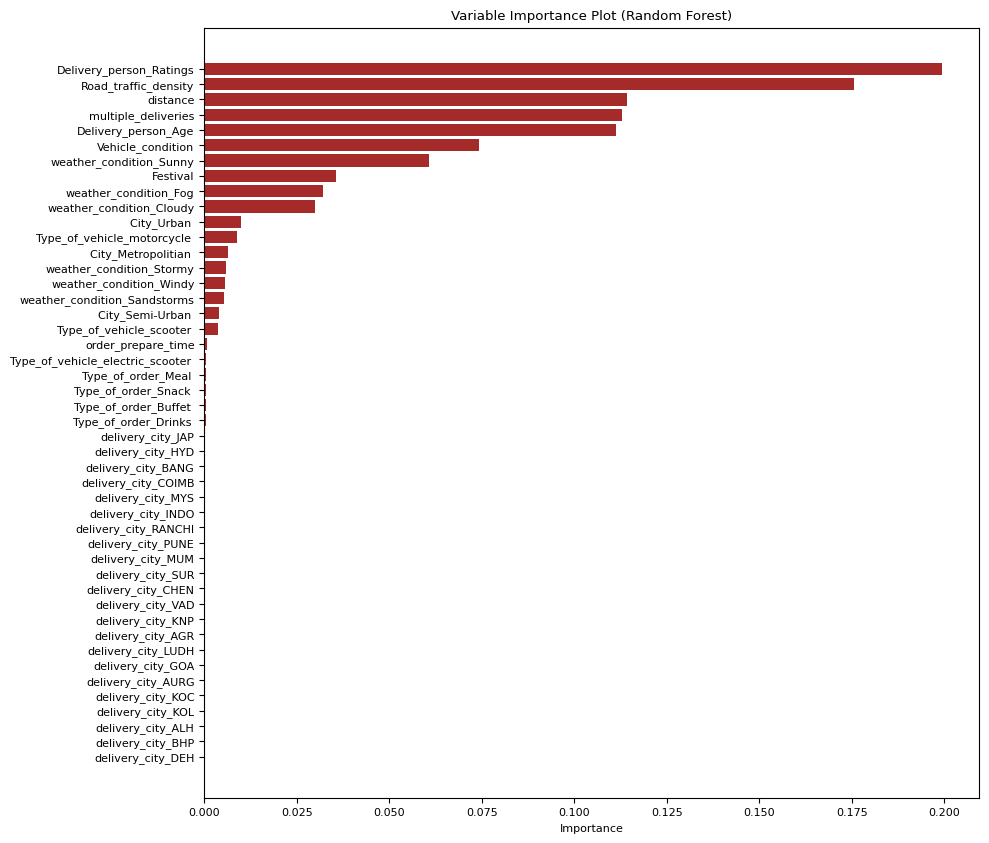

In [236]:
#For the random forest best fit model
rf_best = RandomForestRegressor(n_estimators= 600,
                            min_samples_split = 15,
                            min_samples_leaf = 10,
                            max_features = 10,
                            max_depth = 10,
                            bootstrap = True)
rf_best.fit(X_train,y_train)

# Get feature importances
importances = rf_best.feature_importances_
sorted_idx = np.argsort(importances)
feature_names = np.array(X_train.columns.tolist())

# Plot
plt.figure(figsize=(10, 10))
plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center',color='brown')
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Variable Importance Plot (Random Forest)')
plt.show()







In [238]:
#refitting the model with the most important features

threshold = 0.01 # Adjust this value based on your needs
important_features = X_train.columns[importances > threshold]

# Reduce X_train and X_test to important features only
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Fit the Random Forest model using only important features
clf_important = RandomForestRegressor(
    n_estimators=600,
    max_depth= 10,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=20,
    bootstrap=True)
clf_important.fit(X_train_important, y_train)


RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=10,
                      min_samples_split=15, n_estimators=600)

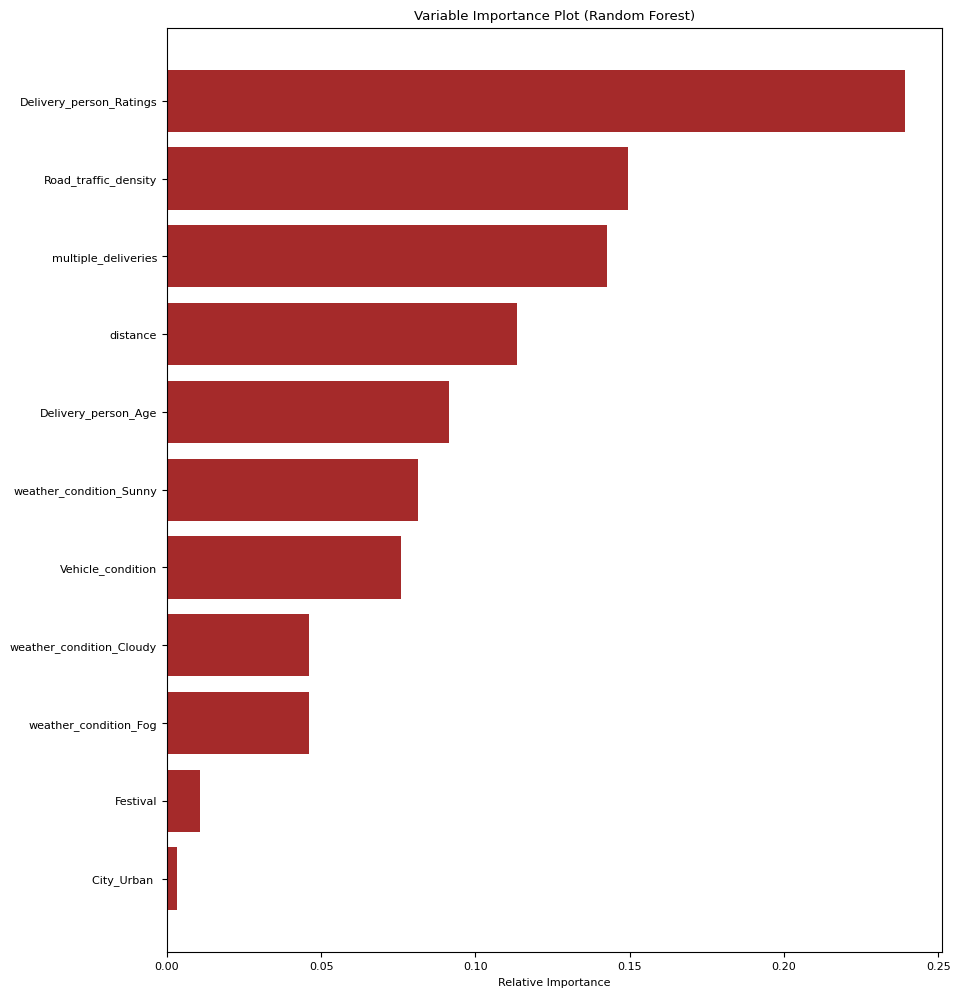

In [246]:
importances = clf_important.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.title("Variable Importance Plot (Random Forest)")
plt.barh(range(X_train_important.shape[1]), importances[sorted_indices], align='center',color='brown')
plt.yticks(range(X_train_important.shape[1]), X_train_important.columns[sorted_indices])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance")
plt.show()

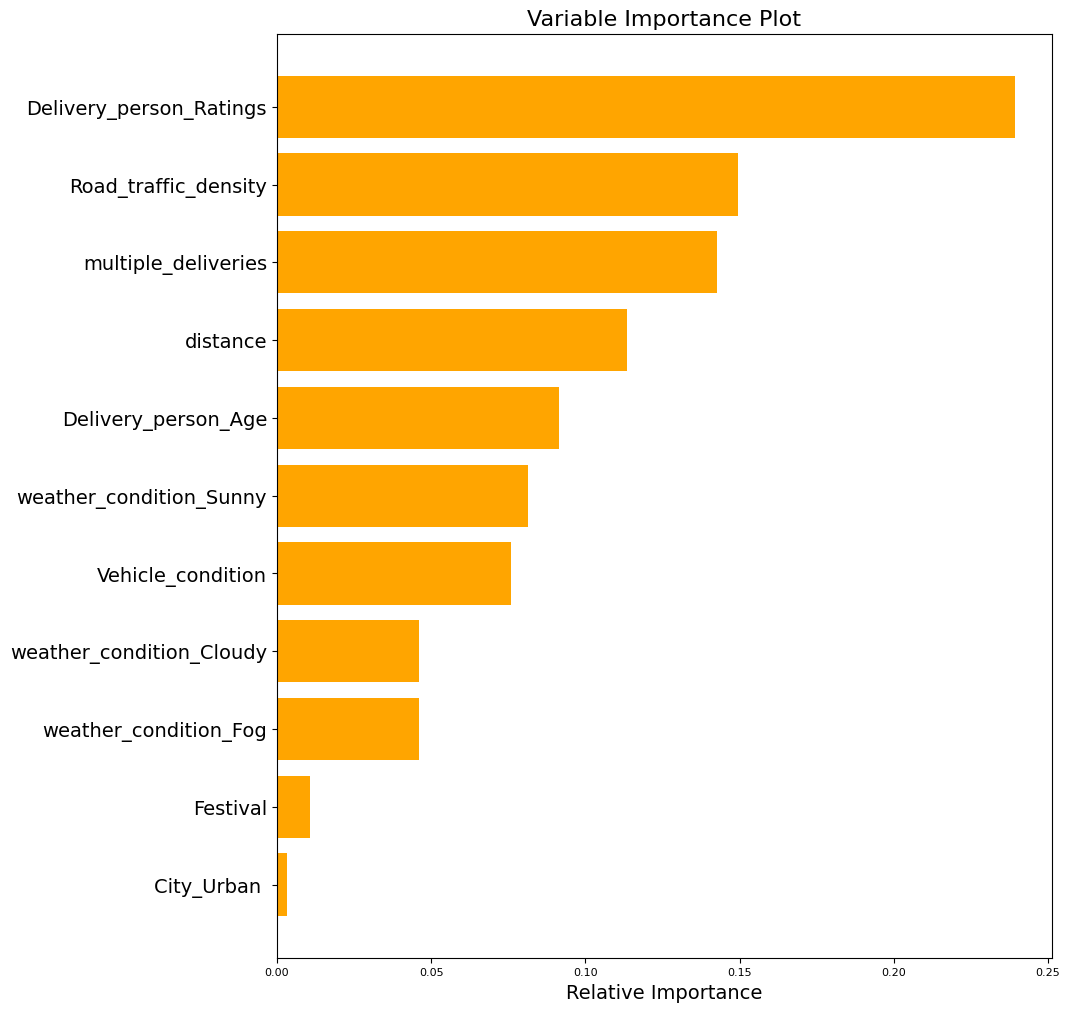

In [298]:
importances = clf_important.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.title("Variable Importance Plot",fontsize=16)
plt.barh(range(X_train_important.shape[1]), importances[sorted_indices], align='center', color='orange', height=0.8)
plt.yticks(range(X_train_important.shape[1]), X_train_important.columns[sorted_indices], fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance", fontsize=14)
plt.show()


# Partial Dependency Plot

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(12, 14))
ax.set_title("Random Forest")
PartialDependenceDisplay.from_estimator(clf_important, X_train_important, features,target=y_train,ax=ax)



# Neural Network

In [ ]:
len(X_train.columns)


In [ ]:
import tensorflow as tf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(46,)),
    keras.layers.Dropout(0.3),  # Dropout layer to reduce overfitting
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)    #Output layer for regression
    ])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
pred_nn_test = model.predict(X_test)

# Make predictions on train set
pred_nn_train = model.predict(X_train)

In [ ]:
np.array(y_test)

In [ ]:
# Calculate the Mean Squared Error
mse_nn1 = mean_squared_error(np.array(y_test),pred_nn_test)
print("Mean Squared Error on Test Set:", mse_nn1)

# Calculate the Mean Squared Error
mse_nn2 = mean_squared_error(np.array(y_train), pred_nn_train)
print("Mean Squared Error on Train Set:", mse_nn2)


print("The Test MAPE is : ", calculate_mape(np.array(y_test), pred_nn_test))
print("The Train MAPE is : ", calculate_mape(np.array(y_train),pred_nn_train))


print("The Test R-squared value is : ",r2_score(np.array(y_test), pred_nn_test))
print("The Test R-squared value is : ", r2_score(np.array(y_train),pred_nn_train))


# Fitting the final RF model - Using the important predictors identified by vip plot

In [ ]:
#For the random forest best fit model
full_X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
full_Y = pd.concat([y_train, y_test], axis =0, ignore_index =True)

rf_final = RandomForestRegressor(
    n_estimators=600,
    max_depth= 10,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features='auto',
    bootstrap=True)

rf_final.fit(full_X[important_features], full_Y)


In [ ]:
import pickle
pickle.dump(rf_final, open('model.pkl', 'wb'))
